In [2]:
# importação de bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# encontrar o caminho da pasta

%pwd

'C:\\Users\\gwestin\\OneDrive - SABESP\\Data Models'

In [4]:
# Definir a paleta de cores em HEX
cores_hex = [
    "#12D0FF", "#01AAFF",  # Azuis
    "#FFC601", "#FF8A01",  # Laranjas
    "#FAB180", "#FF8A01",  # Tons de pele
    "#129180", "#12A101",  # Verdes
    "#FFFFFF", "#127001"   # Branco e Verde escuro
]

# Definir a paleta usando o seaborn
sns.set_palette(sns.color_palette(cores_hex))

# Seção 1: Coleta e tratamento

In [5]:
# coletando planilha e transformando em data frame

df = pd.read_excel('final_interna.xlsx')
df.head()

,respondent_id,collector_id,date_created,date_modified,Idade,Gênero,Categoria do cargo,Sigla da sua unidade no período de avaliação desta pesquisa (jun/22 a jun/23),Tempo de atuação na Sabesp,"Quando se fala em veículo de Comunicação Interna Corporativa (Sabesp), qual é o 1° que você se lembra?",...,Comente sua resposta,Sua liderança utiliza o Workplace para se comunicar com a equipe de trabalho,Sua liderança estimula o uso da plataforma?,Que sugestões você tem para melhorar a adoção e o uso do Workplace na Sabesp?,"Em uma escala de 0 a 5, pensando na Comunicação Interna da Sabesp, qual o seu nível de satisfação com os fatores descritos: É ágil",Conteúdo divulgado é suficiente e claro,Dá visibilidade para as atividades e projetos relacionados ao meu trabalho.,Que sugestões você tem para melhorar a comunicação interna na empresa?,"De forma geral, em uma escala de 0 a 5, qual o seu nível de satisfação com a Comunicação Interna Sabesp?",Comente sua resposta.1
0,118468263987,452358577,2023-11-13 08:14:52,2023-11-13 08:18:34,Entre 31 e 40 anos,Feminino,Operacional,pirituba,Menos de 5 anos,workplace,...,NaN,Não,Não,NaN,1.0,1.0,1.0,NaN,1.0,NaN
1,118467766286,452358577,2023-11-12 09:46:03,2023-11-12 09:50:24,Entre 51 e 60 anos,Masculino,Técnico/administrativo,RSTE 05,De 26 a 30 anos,JORNAL MURAL,...,NaN,Não,Não,NaN,3.0,3.0,3.0,NaN,3.0,NaN
2,118467726771,452358577,2023-11-12 06:57:43,2023-11-12 07:03:20,Entre 51 e 60 anos,Masculino,Operacional,MSBR 11,De 11 a 15 anos,email,...,NaN,Sim,Sim,NaN,4.0,4.0,4.0,NaN,4.0,NaN
3,118467347245,452358577,2023-11-11 09:43:22,2023-11-11 09:59:51,Entre 51 e 60 anos,Masculino,Operacional,radi 01,De 21 a 25 anos,intrnet,...,sim,Sim,Sim,sem sugestões,4.0,4.0,4.0,não,4.0,sem comntario
4,118467121882,452358577,2023-11-10 20:36:39,2023-11-10 20:54:30,Entre 61 e 70 anos,Masculino,Operacional,MATC 01,De 21 a 25 anos,SAP,...,NaN,Não,Não,Ser mais evidenciado com assuntos pertinentes ...,4.0,4.0,4.0,Envolver mais os colaboradores através da disp...,4.0,NaN


In [6]:
# rows x columns
df.shape

(1615, 54)

In [7]:
columns_list = df.columns.tolist()

for index, columns in enumerate(columns_list):
    print(f"{index}: {columns}")

0: respondent_id
1: collector_id
2: date_created
3: date_modified
4: Idade
5: Gênero
6: Categoria do cargo
7: Sigla da sua unidade no período de avaliação desta pesquisa (jun/22 a jun/23)
8: Tempo de atuação na Sabesp
9: Quando se fala em veículo de Comunicação Interna Corporativa (Sabesp), qual é o 1° que você se lembra?
10: Em ordem de prioridade de 1 a 7,  onde 1 é menos eficaz e 7 é mais eficaz, quais ferramentas você considera mais eficazes para se manter informado? - Comunicado Sabesp: 
11: Email matinal com as principais informações divulgadas no dia anterior no Workplace
12: Jornal Mural
13: Portal da Unidade
14: Página da Unidade no Portal Sabesp
15: Portal Corporativo Sabesp
16: TV Corporativa
17: Workplace
18: Comente sua resposta:
19: Existem outros meios de comunicação que você utiliza para se manter informado sobre a Sabesp ou suas atividades?
20: Quais?
21: Você tem acesso a TV Corporativa?
22: Qual sua percepção sobre a TV Corporativa? (Selecione quantas forem verdadeir

#### Nota importante sobre as colunas

**Coluna 10** inaugura série (10 a 18), sendo 10 e 17 relacionadas e 18 aberta. <br>
"Em ordem de prioridade de 1 a 7,  onde 1 é menos eficaz e 7 é mais eficaz, quais ferramentas você considera mais eficazes para se manter informado?"

**Coluna 22** inaugura série (22 a 29), sendo 22 a 27 relacionadas e 28 e 29 abertas. <br>
"Qual sua percepção sobre a TV Corporativa? (Selecione quantas forem verdadeiras)"

**Coluna 32** inaugura série (32 a 44), sendo 32 a 43 relacionadas e 44 aberta. <br>
"Como você utiliza o Workplace? (selecione tantas quantas forem verdadeiras)"

**Coluna 48** inaugura série (48 a 50), sendo todas relacionadas. <br>
"Em uma escala de 0 a 5, pensando na Comunicação Interna da Sabesp, qual o seu nível de satisfação com os fatores descritos:"

---
As séries devem ser agrupas e trabalhadas em sistema categórico, provavelmente por contagem. Join é possível na 1 e na ultima série. 

### Colunas textuais

- colunas 1 a 3 não tem utilidade -> drop
- colunas 4 a 8 são a representatividade de respondentes 
- colunas totalmente abertas devem ser tratadas com NLP em um bloco separado (col: 29, 44 e 51 pelo menos)

In [8]:
# descobrir colunas numéricas para tratamento dos dados
tipos_de_dados = df.dtypes

for indice, (nome_coluna, tipo) in enumerate(tipos_de_dados.items()):
    if tipo == 'object':
        print(f"Índice {indice}: text")
    else:
        print(f"Índice {indice}: A coluna '{nome_coluna}' é numérica.")


Índice 0: A coluna 'respondent_id' é numérica.
Índice 1: A coluna 'collector_id' é numérica.
Índice 2: A coluna 'date_created' é numérica.
Índice 3: A coluna 'date_modified' é numérica.
Índice 4: text
Índice 5: text
Índice 6: text
Índice 7: text
Índice 8: text
Índice 9: text
Índice 10: A coluna 'Em ordem de prioridade de 1 a 7,  onde 1 é menos eficaz e 7 é mais eficaz, quais ferramentas você considera mais eficazes para se manter informado? - Comunicado Sabesp: ' é numérica.
Índice 11: A coluna 'Email matinal com as principais informações divulgadas no dia anterior no Workplace' é numérica.
Índice 12: A coluna 'Jornal Mural' é numérica.
Índice 13: A coluna 'Portal da Unidade' é numérica.
Índice 14: A coluna 'Página da Unidade no Portal Sabesp' é numérica.
Índice 15: A coluna 'Portal Corporativo Sabesp' é numérica.
Índice 16: A coluna 'TV Corporativa' é numérica.
Índice 17: A coluna 'Workplace' é numérica.
Índice 18: text
Índice 19: text
Índice 20: text
Índice 21: text
Índice 22: text
Í

In [9]:
# excluir colunas 1 a 3 da base
df = df.drop(columns=['collector_id', 'date_created', 'date_modified'])

In [10]:
df.shape

(1615, 51)

In [11]:
# renomear algumas colunas para facilitar o entendimento e exposição

#renomeando colunas
df.rename(columns = {'Em ordem de prioridade de 1 a 7,  onde 1 é menos eficaz e 7 é mais eficaz, quais ferramentas você considera mais eficazes para se manter informado? - Comunicado Sabesp: ' : 'Comunicado Sabesp (serie 0 a 7)'}, inplace=True)
df.rename(columns = {'Email matinal com as principais informações divulgadas no dia anterior no Workplace' : 'E-mail matinal Workplace'}, inplace=True)
df.rename(columns = {'Em uma escala de 0 a 5, pensando na Comunicação Interna da Sabesp, qual o seu nível de satisfação com os fatores descritos: É ágil' : 'É ágil (serie 0 a 5)'}, inplace=True)
df.rename(columns = {'De forma geral, em uma escala de 0 a 5, qual o seu nível de satisfação com a Comunicação Interna Sabesp?' : 'Qual o seu nível de satisfação com a Comunicação Interna Sabesp?'}, inplace=True)
df.rename(columns = {'Sigla da sua unidade no período de avaliação desta pesquisa (jun/22 a jun/23)' : 'Sigla da UN'}, inplace=True)

In [12]:
# verificar campos puramente numéricos para entender anomalias
df.describe()

,respondent_id,Comunicado Sabesp (serie 0 a 7),E-mail matinal Workplace,Jornal Mural,Portal da Unidade,Página da Unidade no Portal Sabesp,Portal Corporativo Sabesp,TV Corporativa,Workplace,É ágil (serie 0 a 5),Conteúdo divulgado é suficiente e claro,Dá visibilidade para as atividades e projetos relacionados ao meu trabalho.,Qual o seu nível de satisfação com a Comunicação Interna Sabesp?
count,1.615000e+03,1615.000000,1615.000000,1615.000000,0.0,1615.000000,1615.000000,1615.000000,1615.000000,1542.000000,1542.000000,1542.000000,1542.00000
mean,1.184554e+11,5.017337,4.973375,3.402477,NaN,3.981424,4.497214,3.022291,4.570898,3.632296,3.619326,3.354086,3.66083
std,8.117055e+06,1.967127,2.007707,2.033546,NaN,1.832422,1.784162,2.249494,2.023963,1.084524,1.063690,1.174206,1.01181
min,1.184455e+11,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,1.184467e+11,4.000000,4.000000,2.000000,NaN,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.00000
50%,1.184574e+11,5.000000,6.000000,3.000000,NaN,4.000000,4.000000,2.000000,5.000000,4.000000,4.000000,3.000000,4.00000
75%,1.184659e+11,7.000000,7.000000,5.000000,NaN,5.000000,6.000000,5.000000,6.000000,4.000000,4.000000,4.000000,4.00000
max,1.184683e+11,7.000000,7.000000,7.000000,NaN,7.000000,7.000000,7.000000,7.000000,5.000000,5.000000,5.000000,5.00000


In [13]:
# retirar a coluna portal da unidade
df = df.drop(columns=['Portal da Unidade'])

Para preservação da informação mais próxima da tabela inicial 
a partir daqui as modificações se darão pelo uso de outros data frames

In [14]:
# criar um data frame exclusivo para colunas numéricas
df_num = df[['Comunicado Sabesp (serie 0 a 7)', 'E-mail matinal Workplace', 'Jornal Mural', 'Página da Unidade no Portal Sabesp', 'Portal Corporativo Sabesp', 'TV Corporativa', 'Workplace', 'É ágil (serie 0 a 5)', 'Conteúdo divulgado é suficiente e claro', 'Dá visibilidade para as atividades e projetos relacionados ao meu trabalho.', 'Qual o seu nível de satisfação com a Comunicação Interna Sabesp?']]
df_num

,Comunicado Sabesp (serie 0 a 7),E-mail matinal Workplace,Jornal Mural,Página da Unidade no Portal Sabesp,Portal Corporativo Sabesp,TV Corporativa,Workplace,É ágil (serie 0 a 5),Conteúdo divulgado é suficiente e claro,Dá visibilidade para as atividades e projetos relacionados ao meu trabalho.,Qual o seu nível de satisfação com a Comunicação Interna Sabesp?
0,6,7,4,2,3,1,5,1.0,1.0,1.0,1.0
1,4,5,2,3,1,6,7,3.0,3.0,3.0,3.0
2,7,7,1,1,5,1,5,4.0,4.0,4.0,4.0
3,6,5,5,7,7,2,1,4.0,4.0,4.0,4.0
4,7,6,6,7,7,5,6,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
1610,7,6,1,4,2,3,5,NaN,NaN,NaN,NaN
1611,2,3,6,5,4,7,1,4.0,5.0,5.0,5.0
1612,1,2,6,7,4,5,3,5.0,5.0,5.0,5.0
1613,7,6,2,3,4,1,5,4.0,3.0,4.0,4.0


In [15]:
# checar colunas por valores ausentes
df_num.isna().sum()

Comunicado Sabesp (serie 0 a 7)                                                 0
E-mail matinal Workplace                                                        0
Jornal Mural                                                                    0
Página da Unidade no Portal Sabesp                                              0
Portal Corporativo Sabesp                                                       0
TV Corporativa                                                                  0
Workplace                                                                       0
É ágil (serie 0 a 5)                                                           73
Conteúdo divulgado é suficiente e claro                                        73
Dá visibilidade para as atividades e projetos relacionados ao meu trabalho.    73
Qual o seu nível de satisfação com a Comunicação Interna Sabesp?               73
dtype: int64

In [16]:
# split df em duas séries para dropar NaN values
dfnum_serie1 = df_num[['Comunicado Sabesp (serie 0 a 7)', 'E-mail matinal Workplace', 'Jornal Mural', 'Página da Unidade no Portal Sabesp', 'Portal Corporativo Sabesp', 'TV Corporativa', 'Workplace']]
dfnum_serie2 = df_num[['É ágil (serie 0 a 5)', 'Conteúdo divulgado é suficiente e claro', 'Dá visibilidade para as atividades e projetos relacionados ao meu trabalho.', 'Qual o seu nível de satisfação com a Comunicação Interna Sabesp?']]

In [17]:
# dropar linhas NaN para dfnum_serie2
dfnum_serie2 = dfnum_serie2.dropna()
dfnum_serie2.isna().sum()

É ágil (serie 0 a 5)                                                           0
Conteúdo divulgado é suficiente e claro                                        0
Dá visibilidade para as atividades e projetos relacionados ao meu trabalho.    0
Qual o seu nível de satisfação com a Comunicação Interna Sabesp?               0
dtype: int64

In [18]:
# serie descritiva do tipo de público respondente
df_profile = df[['Idade', 'Gênero', 'Categoria do cargo', 'Sigla da UN', 'Tempo de atuação na Sabesp']]
df_profile.head()

,Idade,Gênero,Categoria do cargo,Sigla da UN,Tempo de atuação na Sabesp
0,Entre 31 e 40 anos,Feminino,Operacional,pirituba,Menos de 5 anos
1,Entre 51 e 60 anos,Masculino,Técnico/administrativo,RSTE 05,De 26 a 30 anos
2,Entre 51 e 60 anos,Masculino,Operacional,MSBR 11,De 11 a 15 anos
3,Entre 51 e 60 anos,Masculino,Operacional,radi 01,De 21 a 25 anos
4,Entre 61 e 70 anos,Masculino,Operacional,MATC 01,De 21 a 25 anos


In [19]:
df_profile.head()

,Idade,Gênero,Categoria do cargo,Sigla da UN,Tempo de atuação na Sabesp
0,Entre 31 e 40 anos,Feminino,Operacional,pirituba,Menos de 5 anos
1,Entre 51 e 60 anos,Masculino,Técnico/administrativo,RSTE 05,De 26 a 30 anos
2,Entre 51 e 60 anos,Masculino,Operacional,MSBR 11,De 11 a 15 anos
3,Entre 51 e 60 anos,Masculino,Operacional,radi 01,De 21 a 25 anos
4,Entre 61 e 70 anos,Masculino,Operacional,MATC 01,De 21 a 25 anos


In [20]:
# deixar todas as entradas da Sigla UN como maiúsculas
# evitar retrabalho depois

df['Sigla da UN'] = df['Sigla da UN'].str.upper()
df_profile['Sigla da UN'] = df_profile['Sigla da UN'].str.upper()

C:\Users\gwestin\AppData\Local\Temp\ipykernel_11652\1789879838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_profile['Sigla da UN'] = df_profile['Sigla da UN'].str.upper()


# Seção 2: Análise descritiva dos dados

### Perfil dos respondentes

In [21]:
df_profile.Idade.value_counts()

Entre 51 e 60 anos    615
Entre 41 e 50 anos    461
Entre 31 e 40 anos    229
Entre 61 e 70 anos    202
Entre 18 e 30 anos     74
Menor de 18 anos       30
Mais de 71 anos         4
Name: Idade, dtype: int64

In [22]:
# demonstração da proporção por idade

# Obtenha a contagem de cada categoria
contagem_por_idade = df_profile.Idade.value_counts()

# Calcule a porcentagem para cada categoria
total = contagem_por_idade.sum()

# Exiba as porcentagens formatadas
for categoria, contagem in contagem_por_idade.items():
    porcentagem = (contagem / total) * 100
    print(f'{categoria}: {porcentagem:.2f}%')

Entre 51 e 60 anos: 38.08%
Entre 41 e 50 anos: 28.54%
Entre 31 e 40 anos: 14.18%
Entre 61 e 70 anos: 12.51%
Entre 18 e 30 anos: 4.58%
Menor de 18 anos: 1.86%
Mais de 71 anos: 0.25%


nota: puxar dados da CH com o perfil de funcionários da Sabesp

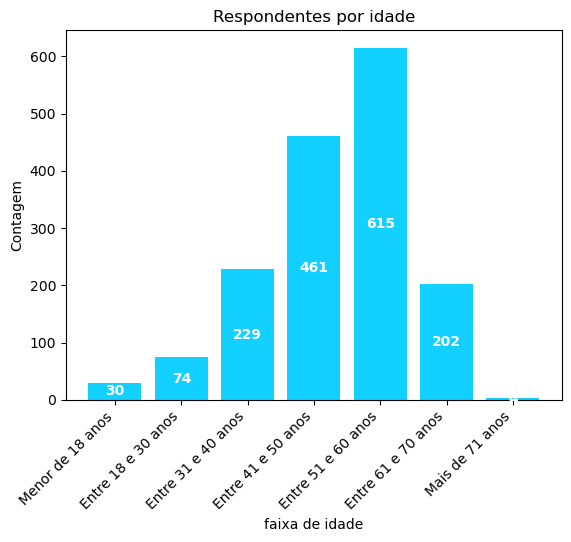

In [23]:
# criar data frame (idade) para receber os valores de contagem
idade_emp = df_profile['Idade'].value_counts()

# Adicionar rótulos e título
plt.xlabel('faixa de idade')
plt.ylabel('Contagem')
plt.title('Respondentes por idade')
# modificar rótulos do eixo x para diagonal
plt.xticks(rotation=45, ha='right')
# Ordenar os valores por idade
ordem_desejada = ['Menor de 18 anos', 'Entre 18 e 30 anos', 'Entre 31 e 40 anos', 'Entre 41 e 50 anos', 'Entre 51 e 60 anos', 'Entre 61 e 70 anos', 'Mais de 71 anos']

# Reorganizar os dados de acordo com a ordem desejada
idade_emp = idade_emp.reindex(ordem_desejada)

# Adicionar rótulos indicando o número de ocorrências em cada barra
for i, v in enumerate(idade_emp.values):
    plt.text(i, v // 2, str(v), ha='center', va='center', color='white', fontweight='bold')

# Criar um gráfico de barras
plt.bar(idade_emp.index, idade_emp.values)

# Mostrar o gráfico
plt.show()

Obs: para exercício de relação entre idade e outros fatores: excluir as linhas <18 e >71

In [24]:
df_profile.Gênero.value_counts()

Masculino                1105
Feminino                  499
Prefiro não responder       8
Outro. Qual?                3
Name: Gênero, dtype: int64

In [25]:
# demonstração da proporção por idade

# Obtenha a contagem de cada categoria
contagem_por_sexo = df_profile.Gênero.value_counts()

# Calcule a porcentagem para cada categoria
total = contagem_por_sexo.sum()

# Exiba as porcentagens formatadas
for categoria, contagem in contagem_por_sexo.items():
    porcentagem = (contagem / total) * 100
    print(f'{categoria}: {porcentagem:.2f}%')

Masculino: 68.42%
Feminino: 30.90%
Prefiro não responder: 0.50%
Outro. Qual?: 0.19%


In [26]:
masculino = df_profile.Gênero.value_counts()[0]
feminino = df_profile.Gênero.value_counts()[1]
total = (masculino + feminino)
p_homem = masculino / total

print(f'Proporção: {p_homem * 100:.2f}% homens e {(1 - p_homem) * 100:.2f}% mulheres.')

Proporção: 68.89% homens e 31.11% mulheres.


Obs: durante o cruzamento de dados, excluir as linhas que não M ou F

In [27]:
# demonstração da proporção por cargo

# Obtenha a contagem de cada categoria
contagem_por_categoria = df_profile['Categoria do cargo'].value_counts()

# Calcule a porcentagem para cada categoria
total = contagem_por_categoria.sum()

# Exiba as porcentagens formatadas
for categoria, contagem in contagem_por_categoria.items():
    porcentagem = (contagem / total) * 100
    print(f'{categoria}: {porcentagem:.2f}%')

Técnico/administrativo: 39.26%
Operacional: 21.80%
Universitário: 21.18%
Gestão/liderança: 14.80%
Aprendiz: 2.97%


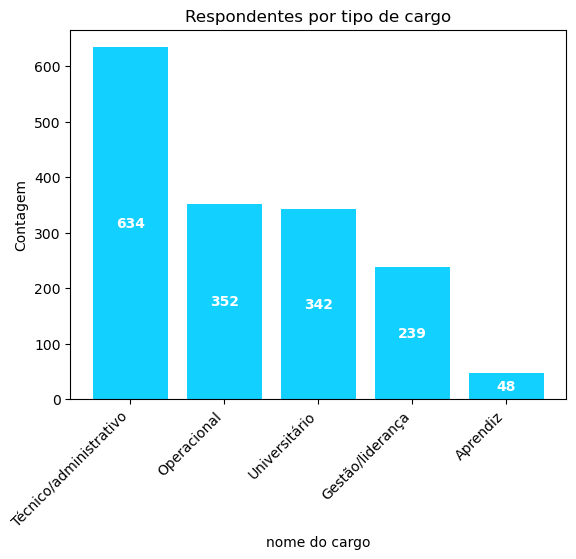

In [28]:
# receber os valores 
tipo_cargo = df_profile['Categoria do cargo'].value_counts()

# Criar um gráfico de barras
plt.bar(tipo_cargo.index, tipo_cargo.values)

# Adicionar rótulos indicando o número de ocorrências em cada barra
for i, v in enumerate(tipo_cargo.values):
    plt.text(i, v // 2, str(v), ha='center', va='center', color='white', fontweight='bold')


# Adicionar rótulos e título
plt.xlabel('nome do cargo')
plt.ylabel('Contagem')
plt.title('Respondentes por tipo de cargo')
# modificar rótulos do eixo x para diagonal
plt.xticks(rotation=45, ha='right')

# Mostrar o gráfico
plt.show()

In [29]:
df_profile['Tempo de atuação na Sabesp'].value_counts()

De 21 a 25 anos    319
De 26 a 30 anos    296
De 11 a 15 anos    268
De 5 a 10 anos     258
De 31 a 35 anos    179
Menos de 5 anos    131
Mais de 36 anos    118
De 16 a 20 anos     46
Name: Tempo de atuação na Sabesp, dtype: int64

In [30]:
# demonstração da proporção por tempo de casa

# Obtenha a contagem de cada categoria
contagem_por_categoria = df_profile['Tempo de atuação na Sabesp'].value_counts()

# Calcule a porcentagem para cada categoria
total = contagem_por_categoria.sum()

# Exiba as porcentagens formatadas
for categoria, contagem in contagem_por_categoria.items():
    porcentagem = (contagem / total) * 100
    print(f'{categoria}: {porcentagem:.2f}%')

De 21 a 25 anos: 19.75%
De 26 a 30 anos: 18.33%
De 11 a 15 anos: 16.59%
De 5 a 10 anos: 15.98%
De 31 a 35 anos: 11.08%
Menos de 5 anos: 8.11%
Mais de 36 anos: 7.31%
De 16 a 20 anos: 2.85%


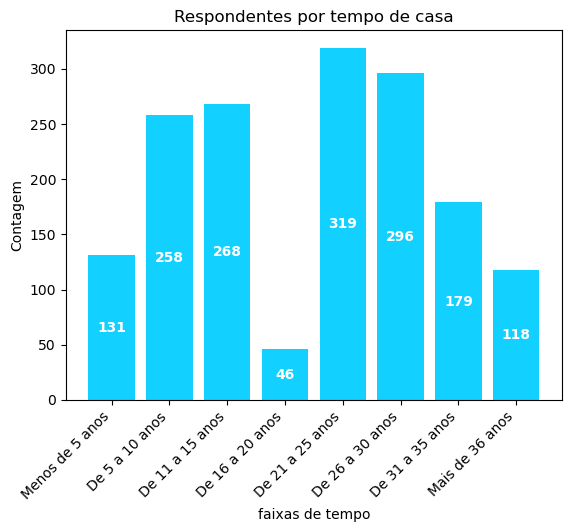

In [31]:
# receber os valores 
tempo_casa = df_profile['Tempo de atuação na Sabesp'].value_counts()


# Adicionar rótulos e título
plt.xlabel('faixas de tempo')
plt.ylabel('Contagem')
plt.title('Respondentes por tempo de casa')
# modificar rótulos do eixo x para diagonal
plt.xticks(rotation=45, ha='right')

# Ordenar os valores por idade
ordem_desejada = ['Menos de 5 anos', 'De 5 a 10 anos', 'De 11 a 15 anos', 'De 16 a 20 anos', 'De 21 a 25 anos', 
                  'De 26 a 30 anos', 'De 31 a 35 anos', 'Mais de 36 anos']

# Reorganizar os dados de acordo com a ordem desejada
tempo_casa = tempo_casa.reindex(ordem_desejada)

# Adicionar rótulos acima das barras indicando o número de ocorrências
for i, v in enumerate(tempo_casa.values):
    plt.text(i, v // 2, str(v), ha='center', va='center', color='white', fontweight='bold')

# Criar um gráfico de barras
plt.bar(tempo_casa.index, tempo_casa.values)

# Mostrar o gráfico
plt.show()

In [32]:
# encontrar as diretorias e superintendências por slice das entras
# as entradas precisam ser do tipo string e maiusculas (ou minusculas)
 
# Novo df diretoria
df_dir = df_profile['Sigla da UN'].str[0]
df_dir = df_dir.rename('Diretoria')

# Criar um novo DataFrame com as duas primeiras letras
df_sup = df_profile['Sigla da UN'].str[:2]
df_sup = df_sup.rename('Superintendencia')

In [33]:
df_dir.value_counts()

M    702
R    586
C    102
T     74
F     60
P     47
K     17
O     11
S      5
N      4
U      3
E      2
D      1
       1
Name: Diretoria, dtype: int64

Há aparentemente um número maior de diretorias do que a realidade

In [34]:
# Filtrar linhas onde a coluna 'Sigla da UN' começa com 'N', 'O', 'S', 'E', 'U', 'D'
filtros = [
    df_profile['Sigla da UN'].str.startswith('N'),
    df_profile['Sigla da UN'].str.startswith('O'),
    df_profile['Sigla da UN'].str.startswith('S'),
    df_profile['Sigla da UN'].str.startswith('E'),
    df_profile['Sigla da UN'].str.startswith('U'),
    df_profile['Sigla da UN'].str.startswith('D')
]

linhas = pd.concat([df_profile[filtro] for filtro in filtros])

linhas

,Idade,Gênero,Categoria do cargo,Sigla da UN,Tempo de atuação na Sabesp
197,Entre 31 e 40 anos,Feminino,Operacional,NOVEMBRO/2023,De 11 a 15 anos
791,Entre 51 e 60 anos,Masculino,Universitário,NCG,De 26 a 30 anos
1249,Entre 31 e 40 anos,Masculino,Universitário,NCA,De 11 a 15 anos
1596,Entre 51 e 60 anos,Feminino,Universitário,NÃO QUERO RESPONDER,De 16 a 20 anos
92,Entre 61 e 70 anos,Feminino,Gestão/liderança,OM,De 31 a 35 anos
166,Entre 51 e 60 anos,Masculino,Operacional,OPRL,De 21 a 25 anos
230,Entre 41 e 50 anos,Masculino,Operacional,OGEC,De 5 a 10 anos
477,Entre 41 e 50 anos,Masculino,Gestão/liderança,ONMN,De 26 a 30 anos
753,Entre 61 e 70 anos,Masculino,Técnico/administrativo,OGLD,De 31 a 35 anos
766,Entre 51 e 60 anos,Masculino,Universitário,ODG,De 31 a 35 anos


In [35]:
# adicionar diretoria ao df_profile

df_profile['diretoria'] = df_profile['Sigla da UN'].str[0]
df_profile['sup'] = df_profile['Sigla da UN'].str[0:2]

C:\Users\gwestin\AppData\Local\Temp\ipykernel_11652\2397456136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_profile['diretoria'] = df_profile['Sigla da UN'].str[0]
C:\Users\gwestin\AppData\Local\Temp\ipykernel_11652\2397456136.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_profile['sup'] = df_profile['Sigla da UN'].str[0:2]


In [36]:
df_profile

,Idade,Gênero,Categoria do cargo,Sigla da UN,Tempo de atuação na Sabesp,diretoria,sup
0,Entre 31 e 40 anos,Feminino,Operacional,PIRITUBA,Menos de 5 anos,P,PI
1,Entre 51 e 60 anos,Masculino,Técnico/administrativo,RSTE 05,De 26 a 30 anos,R,RS
2,Entre 51 e 60 anos,Masculino,Operacional,MSBR 11,De 11 a 15 anos,M,MS
3,Entre 51 e 60 anos,Masculino,Operacional,RADI 01,De 21 a 25 anos,R,RA
4,Entre 61 e 70 anos,Masculino,Operacional,MATC 01,De 21 a 25 anos,M,MA
...,...,...,...,...,...,...,...
1610,Entre 51 e 60 anos,Feminino,Universitário,PCI,De 31 a 35 anos,P,PC
1611,Entre 41 e 50 anos,Feminino,Universitário,TOR,De 11 a 15 anos,T,TO
1612,Entre 51 e 60 anos,Feminino,Universitário,PCI,De 26 a 30 anos,P,PC
1613,Entre 41 e 50 anos,Feminino,Técnico/administrativo,PCI,De 21 a 25 anos,P,PC


In [37]:
mapeamento = {
    'SA': 'M',
    'OM': 'R',
    'OG': 'M',
    'OP': 'R',
    'ON': 'M',
    'OD': 'M',
    'EN': 'T',
    'UG': 'M',
    'UB': 'R',
    'NC': 'X',
    'DR': 'X',
    'NO': 'X',
    'NÃ': 'X',
    'E': 'X'
}

# Substituir os valores com base no mapeamento
df_profile['diretoria'] = df_profile['sup'].replace(mapeamento)
# retornar a diretoria com apenas uma letra 
df_profile['diretoria'] = df_profile['diretoria'].str[0]

# Exemplo de exibição do DataFrame resultante
linhas = pd.concat([df_profile[filtro] for filtro in filtros])
linhas

C:\Users\gwestin\AppData\Local\Temp\ipykernel_11652\957039412.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_profile['diretoria'] = df_profile['sup'].replace(mapeamento)
C:\Users\gwestin\AppData\Local\Temp\ipykernel_11652\957039412.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_profile['diretoria'] = df_profile['diretoria'].str[0]


,Idade,Gênero,Categoria do cargo,Sigla da UN,Tempo de atuação na Sabesp,diretoria,sup
197,Entre 31 e 40 anos,Feminino,Operacional,NOVEMBRO/2023,De 11 a 15 anos,X,NO
791,Entre 51 e 60 anos,Masculino,Universitário,NCG,De 26 a 30 anos,X,NC
1249,Entre 31 e 40 anos,Masculino,Universitário,NCA,De 11 a 15 anos,X,NC
1596,Entre 51 e 60 anos,Feminino,Universitário,NÃO QUERO RESPONDER,De 16 a 20 anos,X,NÃ
92,Entre 61 e 70 anos,Feminino,Gestão/liderança,OM,De 31 a 35 anos,R,OM
166,Entre 51 e 60 anos,Masculino,Operacional,OPRL,De 21 a 25 anos,R,OP
230,Entre 41 e 50 anos,Masculino,Operacional,OGEC,De 5 a 10 anos,M,OG
477,Entre 41 e 50 anos,Masculino,Gestão/liderança,ONMN,De 26 a 30 anos,M,ON
753,Entre 61 e 70 anos,Masculino,Técnico/administrativo,OGLD,De 31 a 35 anos,M,OG
766,Entre 51 e 60 anos,Masculino,Universitário,ODG,De 31 a 35 anos,M,OD


In [38]:
# checar valores
df_profile['diretoria'].value_counts()

M    716
R    591
C    102
T     75
F     60
P     47
K     17
X      6
       1
Name: diretoria, dtype: int64

In [39]:
# checar por eventuais erros
df_profile['diretoria'].isnull().sum(), df_profile['diretoria'].isna().sum()

(0, 0)

X é a "diretoria" para alocação de elementos não especificados 

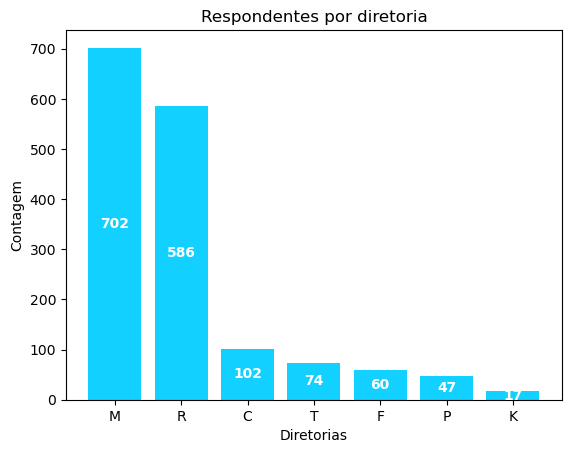

In [40]:
# Puxar os dados das diretorias
value_counts = df_dir.value_counts()

# Selecionar os 7 maiores valores 
# evitando por hora excluir as entradas que não sejam diretorias
top_7 = value_counts.head(7)

# Criar um gráfico de barras
plt.bar(top_7.index, top_7.values)

# Adicionar rótulos acima das barras indicando o número de ocorrências
for i, v in enumerate(top_7.values):
    plt.text(i, v // 2, str(v), ha='center', va='center', color='white', fontweight='bold')

# Adicionar rótulos e título
plt.xlabel('Diretorias')
plt.ylabel('Contagem')
plt.title('Respondentes por diretoria')

# Mostrar o gráfico
plt.show()


In [41]:
# Usar value_counts() para contar os valores únicos
value_counts = df_sup.value_counts()

# Usar um laço for com enumerate para acessar índice e contagem
for idx, count in enumerate(value_counts):
    valor = value_counts.index[idx]
    print(f"Valor: {valor}, Contagem: {count}")

Valor: MN, Contagem: 132
Valor: MS, Contagem: 119
Valor: RV, Contagem: 108
Valor: MC, Contagem: 94
Valor: MO, Contagem: 88
Valor: ML, Contagem: 80
Valor: MA, Contagem: 79
Valor: RA, Contagem: 78
Valor: RS, Contagem: 76
Valor: RB, Contagem: 66
Valor: MT, Contagem: 62
Valor: RG, Contagem: 59
Valor: RM, Contagem: 50
Valor: RJ, Contagem: 45
Valor: RN, Contagem: 34
Valor: RT, Contagem: 31
Valor: TO, Contagem: 25
Valor: RR, Contagem: 23
Valor: CS, Contagem: 22
Valor: CP, Contagem: 21
Valor: FT, Contagem: 17
Valor: CH, Contagem: 17
Valor: MM, Contagem: 16
Valor: FS, Contagem: 15
Valor: TE, Contagem: 14
Valor: KE, Contagem: 14
Valor: MI, Contagem: 13
Valor: TG, Contagem: 12
Valor: CM, Contagem: 12
Valor: PC, Contagem: 11
Valor: RE, Contagem: 10
Valor: MP, Contagem: 10
Valor: FX, Contagem: 10
Valor: CI, Contagem: 10
Valor: PI, Contagem: 9
Valor: TA, Contagem: 8
Valor: PJ, Contagem: 7
Valor: FF, Contagem: 6
Valor: FC, Contagem: 6
Valor: CG, Contagem: 5
Valor: CL, Contagem: 5
Valor: SA, Contagem:

# Análise dos canais internos

### Dados descritivos gerais

In [42]:
# retonamada do data frame numerico 1
dfnum_serie1.describe()

,Comunicado Sabesp (serie 0 a 7),E-mail matinal Workplace,Jornal Mural,Página da Unidade no Portal Sabesp,Portal Corporativo Sabesp,TV Corporativa,Workplace
count,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000
mean,5.017337,4.973375,3.402477,3.981424,4.497214,3.022291,4.570898
std,1.967127,2.007707,2.033546,1.832422,1.784162,2.249494,2.023963
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,2.000000,3.000000,3.000000,1.000000,3.000000
50%,5.000000,6.000000,3.000000,4.000000,4.000000,2.000000,5.000000
75%,7.000000,7.000000,5.000000,5.000000,6.000000,5.000000,6.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [43]:
# exibição de média de preferência dos produtos (em ordem crescente)
dfnum_serie1.mean().sort_values().to_frame(name='Média')

,Média
TV Corporativa,3.022291
Jornal Mural,3.402477
Página da Unidade no Portal Sabesp,3.981424
Portal Corporativo Sabesp,4.497214
Workplace,4.570898
E-mail matinal Workplace,4.973375
Comunicado Sabesp (serie 0 a 7),5.017337


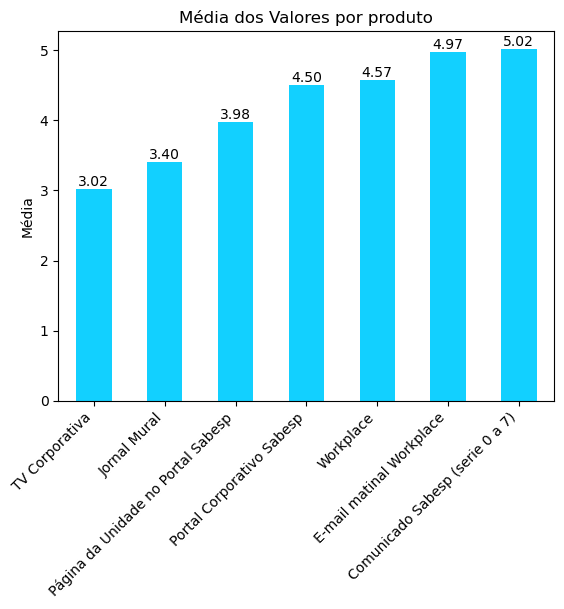

In [44]:
# Transformar os valores em um DataFrame para plotagem
df_mean = dfnum_serie1.mean().sort_values().to_frame(name='Média')

# Plotar um gráfico de barras
ax = df_mean.plot(kind='bar')
ax.set_ylabel('Média')
ax.set_title('Média dos Valores por produto')
ax.legend().remove()  # Para remover a legenda, se preferir
# modificar rótulos do eixo x para diagonal
plt.xticks(rotation=45, ha='right')

# Adicionar os rótulos de média dentro das barras
for i, v in enumerate(df_mean['Média']):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontweight='light')


# Mostrar o gráfico
plt.show()

In [45]:
# descritivo geral 
dfnum_serie2.describe()

,É ágil (serie 0 a 5),Conteúdo divulgado é suficiente e claro,Dá visibilidade para as atividades e projetos relacionados ao meu trabalho.,Qual o seu nível de satisfação com a Comunicação Interna Sabesp?
count,1542.000000,1542.000000,1542.000000,1542.00000
mean,3.632296,3.619326,3.354086,3.66083
std,1.084524,1.063690,1.174206,1.01181
min,1.000000,1.000000,1.000000,1.00000
25%,3.000000,3.000000,3.000000,3.00000
50%,4.000000,4.000000,3.000000,4.00000
75%,4.000000,4.000000,4.000000,4.00000
max,5.000000,5.000000,5.000000,5.00000


In [46]:
# exibição de média de preferência dos atributos (em ordem crescente)
dfnum_serie2.mean().sort_values().to_frame(name='Média')

,Média
Dá visibilidade para as atividades e projetos relacionados ao meu trabalho.,3.354086
Conteúdo divulgado é suficiente e claro,3.619326
É ágil (serie 0 a 5),3.632296
Qual o seu nível de satisfação com a Comunicação Interna Sabesp?,3.660830


### Série: percepção de veículo por gênero e idade

Aqui é realizada uma análise que irá comparar a avaliação da prioridade dos diferentes canais de comunicação por faixa etária separada em dois eixos: masculino e feminino

Essa análise busca:

- avaliar se há diferenças significativas entre homens e mulheres de faixa etárias similares
- avaliar se há veículos mais adaptados para uma faixa etária em específico
- avaliar se há indícios de um trabalho específico para um determinado grupo

In [47]:
# criar data frame amplo de manipulação 
df_plot = df
# retirar do dataframe novo os atributos de gênero != M, F
df_plot = df[(df['Gênero'] == 'Masculino') | (df['Gênero'] == 'Feminino')]

# plotar colunas que serão usadas para as séries
print(dfnum_serie1.columns)

Index(['Comunicado Sabesp (serie 0 a 7)', 'E-mail matinal Workplace',
       'Jornal Mural', 'Página da Unidade no Portal Sabesp',
       'Portal Corporativo Sabesp', 'TV Corporativa', 'Workplace'],
      dtype='object')


In [48]:
# numero de ocorrências por faixa etária
df_plot['Idade'].value_counts()

Entre 51 e 60 anos    610
Entre 41 e 50 anos    458
Entre 31 e 40 anos    227
Entre 61 e 70 anos    202
Entre 18 e 30 anos     73
Menor de 18 anos       30
Mais de 71 anos         4
Name: Idade, dtype: int64

In [49]:
# retrirar as linhas de pessoas com mais de 70 anos
df_idade = df_plot.loc[df_plot['Idade'] != 'Mais de 71 anos']
#checar
df_idade['Idade'].value_counts()

Entre 51 e 60 anos    610
Entre 41 e 50 anos    458
Entre 31 e 40 anos    227
Entre 61 e 70 anos    202
Entre 18 e 30 anos     73
Menor de 18 anos       30
Name: Idade, dtype: int64

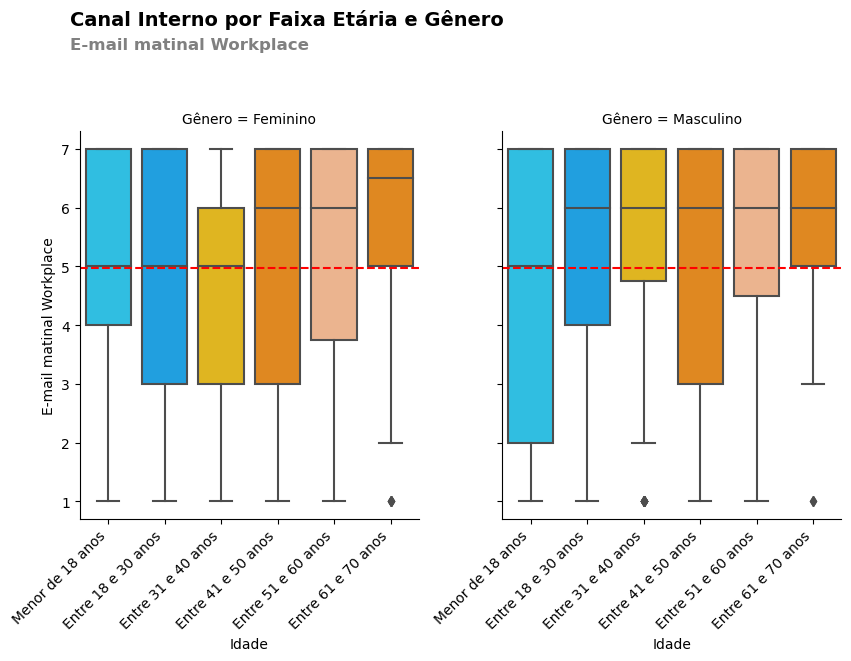

In [50]:
# ordem desejada do eixo x para todas as séries abaixo
ordem_desejada = ['Menor de 18 anos', 'Entre 18 e 30 anos', 'Entre 31 e 40 anos', 'Entre 41 e 50 anos', 'Entre 51 e 60 anos', 'Entre 61 e 70 anos']

# gráfico boxplot para e-mail por idade e gênero
email = sns.catplot(x="Idade", y="E-mail matinal Workplace",
                col="Gênero",
                data=df_idade, kind="box",              
                height=4.8, aspect=0.9)

# Ajuste a posição inicial dos rótulos no eixo x
email.set_xticklabels(rotation=45, ha='right')


# Rotacionar os rótulos do eixo x em 45 graus
for ax in email.axes.flat:
    ax.set_xticks(range(len(ordem_desejada)))
    ax.set_xticklabels(ordem_desejada)
    
    # Adicionar linha pontilhada vermelha para a média
    mean_value = df_idade['E-mail matinal Workplace'].mean()
    ax.axhline(mean_value, color='red', linestyle='dashed', linewidth=1.5, label='Média')
    
    
# Adicionar título geral e subtítulo
plt.figtext(0.05, 1.15, 'Canal Interno por Faixa Etária e Gênero', fontsize=14, fontweight='bold', ha='left')
plt.figtext(0.05, 1.10, 'E-mail matinal Workplace', fontsize=12, fontweight='bold', color='gray', ha='left')

plt.show()

- Há uma predisposição no público masculino de avaliar melhor o e-mail matinal para quase todas as faixas
- É um canal com boa entrada em todas as faixas

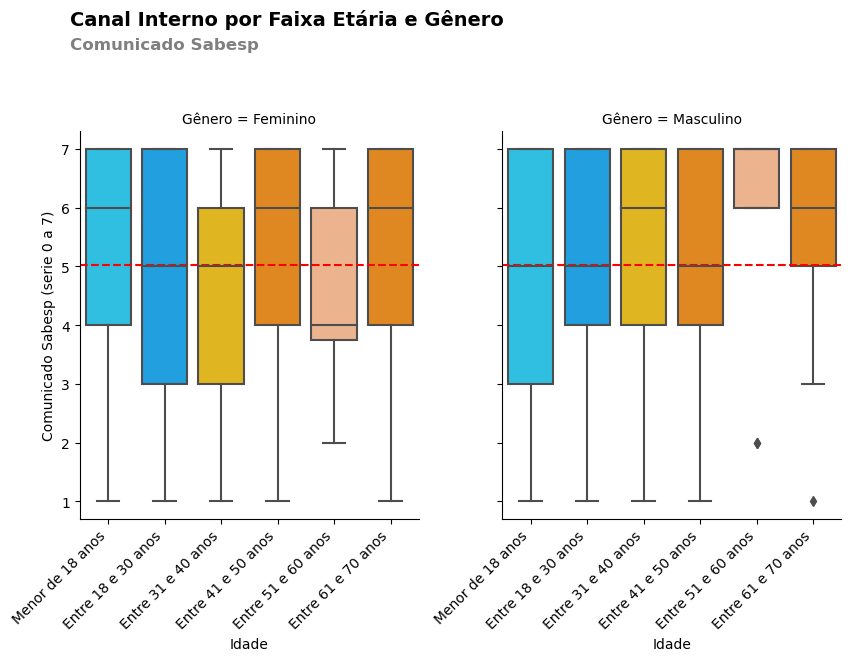

In [51]:
# gráfico boxplot para Comunicado Sabesp por idade e gênero
email = sns.catplot(x="Idade", y="Comunicado Sabesp (serie 0 a 7)",
                col="Gênero",
                data=df_idade, kind="box",               
                height=4.8, aspect=0.9)

# Ajuste a posição inicial dos rótulos no eixo x
email.set_xticklabels(rotation=45, ha='right')

# Rotacionar os rótulos do eixo x em 45 graus
for ax in email.axes.flat:
    ax.set_xticks(range(len(ordem_desejada)))
    ax.set_xticklabels(ordem_desejada)

    # Adicionar linha pontilhada vermelha para a média
    mean_value = df_idade['Comunicado Sabesp (serie 0 a 7)'].mean()
    ax.axhline(mean_value, color='red', linestyle='dashed', linewidth=1.5, label='Média')

    
# Adicionar título geral e subtítulo
plt.figtext(0.05, 1.15, 'Canal Interno por Faixa Etária e Gênero', fontsize=14, fontweight='bold', ha='left')
plt.figtext(0.05, 1.10, 'Comunicado Sabesp', fontsize=12, fontweight='bold', color='gray', ha='left')

plt.show()

- não há um padrão identificável
- é um produto com boa adesão de forma geral

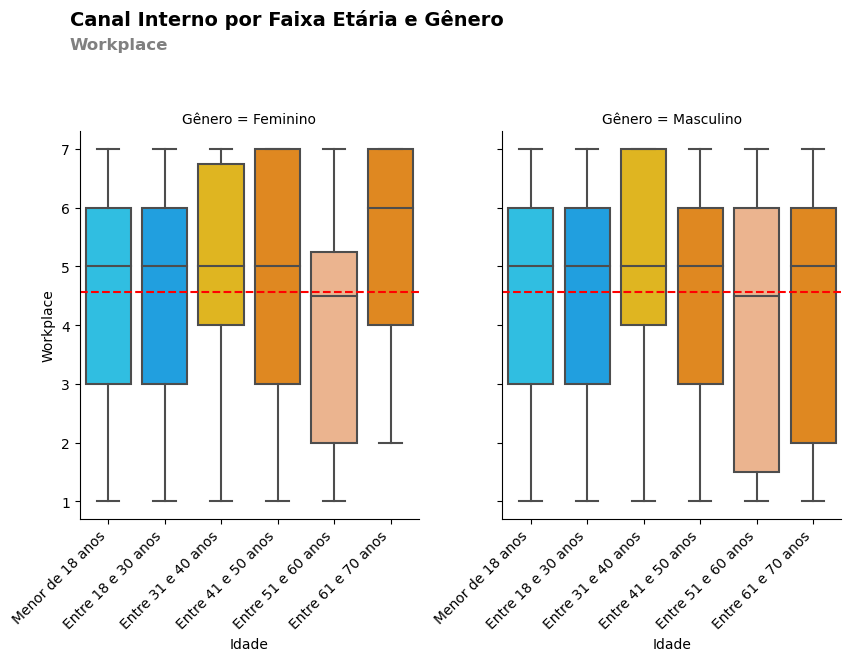

In [52]:
# gráfico boxplot para Comunicado Sabesp por idade e gênero
email = sns.catplot(x="Idade", y="Workplace",
                col="Gênero",
                data=df_idade, kind="box",               
                height=4.8, aspect=0.9)

# Ajuste a posição inicial dos rótulos no eixo x
email.set_xticklabels(rotation=45, ha='right')

# Rotacionar os rótulos do eixo x em 45 graus
for ax in email.axes.flat:
    ax.set_xticks(range(len(ordem_desejada)))
    ax.set_xticklabels(ordem_desejada)
    
    # Adicionar linha pontilhada vermelha para a média
    mean_value = df_idade['Workplace'].mean()
    ax.axhline(mean_value, color='red', linestyle='dashed', linewidth=1.5, label='Média')

# Adicionar título geral e subtítulo
plt.figtext(0.05, 1.15, 'Canal Interno por Faixa Etária e Gênero', fontsize=14, fontweight='bold', ha='left')
plt.figtext(0.05, 1.10, 'Workplace', fontsize=12, fontweight='bold', color='gray', ha='left')

plt.show()

- Há uma nítida queda de aceitação para a faixa etária entre 51 e 60 anos
- A faixa que mais se identifica com a ferramenta está entre 31 e 40 anos

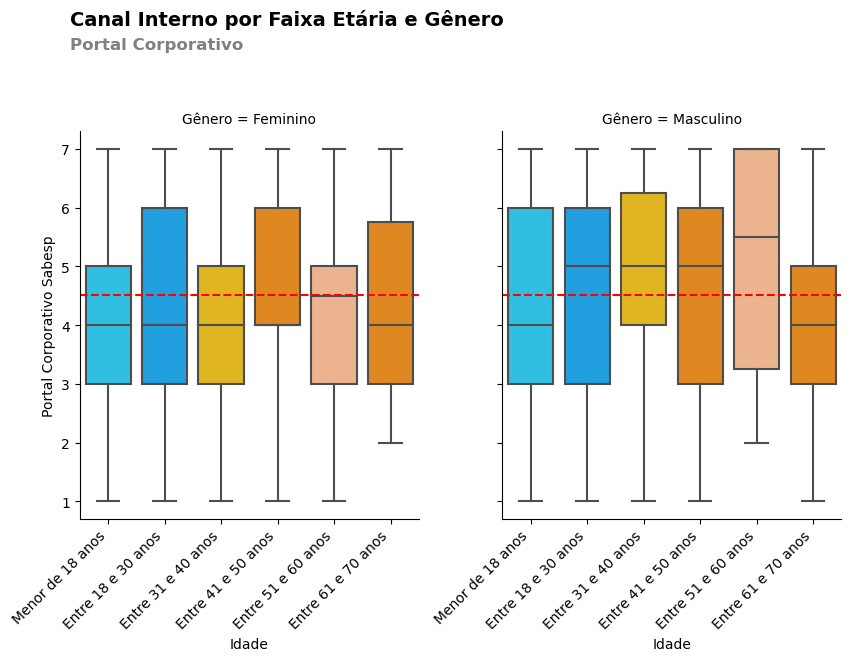

In [53]:
# gráfico boxplot para Portal por idade e gênero
email = sns.catplot(x="Idade", y="Portal Corporativo Sabesp",
                col="Gênero",
                data=df_idade, kind="box",               
                height=4.8, aspect=0.9)

# Ajuste a posição inicial dos rótulos no eixo x
email.set_xticklabels(rotation=45, ha='right')

# Rotacionar os rótulos do eixo x em 45 graus
for ax in email.axes.flat:
    ax.set_xticks(range(len(ordem_desejada)))
    ax.set_xticklabels(ordem_desejada)
    
    # Adicionar linha pontilhada vermelha para a média
    mean_value = df_idade['Portal Corporativo Sabesp'].mean()
    ax.axhline(mean_value, color='red', linestyle='dashed', linewidth=1.5, label='Média')

# Adicionar título geral e subtítulo
plt.figtext(0.05, 1.15, 'Canal Interno por Faixa Etária e Gênero', fontsize=14, fontweight='bold', ha='left')
plt.figtext(0.05, 1.10, 'Portal Corporativo', fontsize=12, fontweight='bold', color='gray', ha='left')

plt.show()

- Há preferência do público masculino por essa modalidade em quase todas as faixas
- Indicativo de que talvez o público feminino tenha maior aderência as outras plataformas 

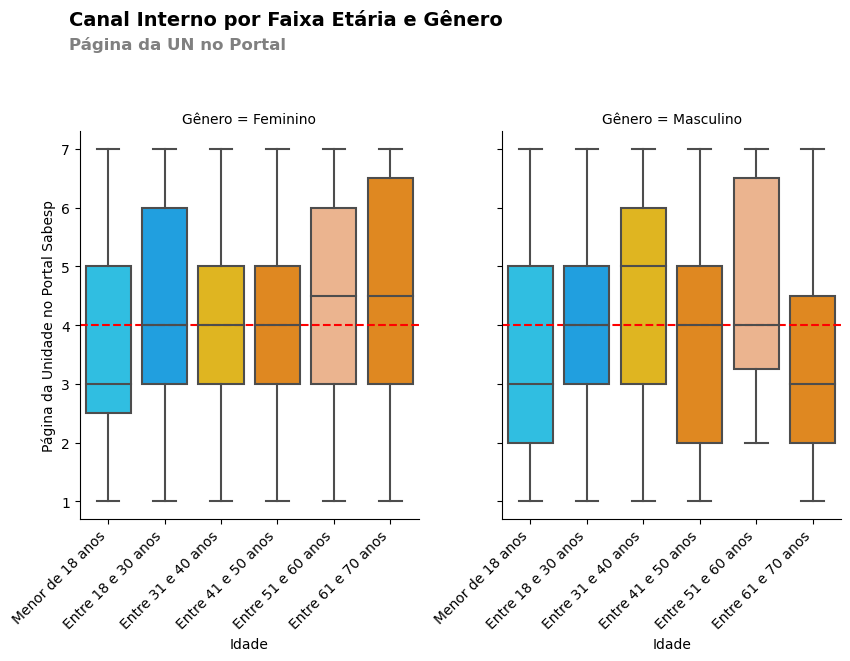

In [54]:
# gráfico boxplot para Página da Unidade por idade e gênero
email = sns.catplot(x="Idade", y="Página da Unidade no Portal Sabesp",
                col="Gênero",
                data=df_idade, kind="box",               
                height=4.8, aspect=0.9)

# Ajuste a posição inicial dos rótulos no eixo x
email.set_xticklabels(rotation=45, ha='right')

# Rotacionar os rótulos do eixo x em 45 graus
for ax in email.axes.flat:
    ax.set_xticks(range(len(ordem_desejada)))
    ax.set_xticklabels(ordem_desejada)
    
    # Adicionar linha pontilhada vermelha para a média
    mean_value = df_idade['Página da Unidade no Portal Sabesp'].mean()
    ax.axhline(mean_value, color='red', linestyle='dashed', linewidth=1.5, label='Média')

# Adicionar título geral e subtítulo
plt.figtext(0.05, 1.15, 'Canal Interno por Faixa Etária e Gênero', fontsize=14, fontweight='bold', ha='left')
plt.figtext(0.05, 1.10, 'Página da UN no Portal', fontsize=12, fontweight='bold', color='gray', ha='left')

plt.show()

- Publico mais jovem tem menos predisposição
- há uma tendência de alta no público mais velho

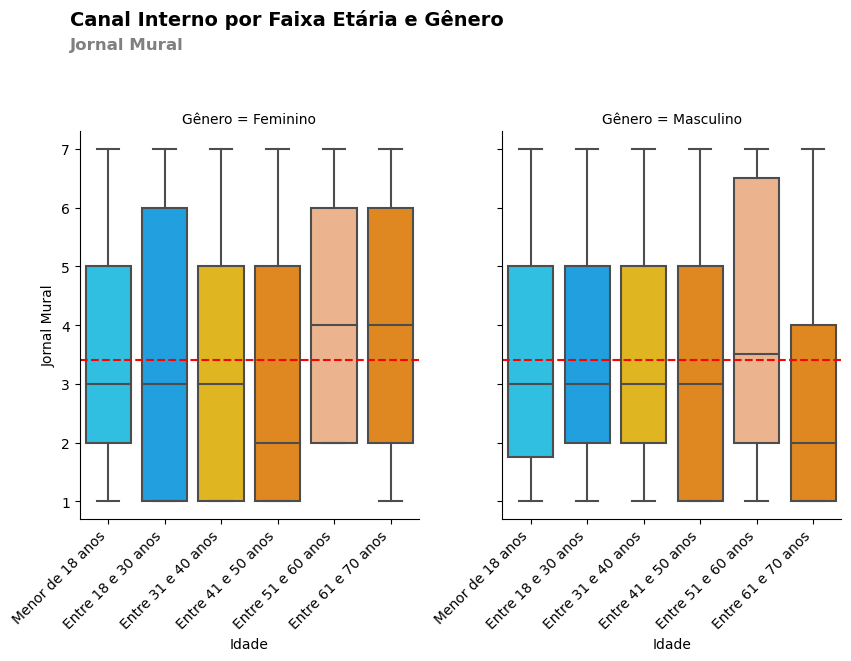

In [55]:
# gráfico boxplot para Jornal Mural por idade e gênero
email = sns.catplot(x="Idade", y="Jornal Mural",
                col="Gênero",
                data=df_idade, kind="box",               
                height=4.8, aspect=0.9)

# Ajuste a posição inicial dos rótulos no eixo x
email.set_xticklabels(rotation=45, ha='right')

# Rotacionar os rótulos do eixo x em 45 graus
for ax in email.axes.flat:
    ax.set_xticks(range(len(ordem_desejada)))
    ax.set_xticklabels(ordem_desejada)
    
    # Adicionar linha pontilhada vermelha para a média
    mean_value = df_idade['Jornal Mural'].mean()
    ax.axhline(mean_value, color='red', linestyle='dashed', linewidth=1.5, label='Média')

plt.figtext(0.05, 1.15, 'Canal Interno por Faixa Etária e Gênero', fontsize=14, fontweight='bold', ha='left')
plt.figtext(0.05, 1.10, 'Jornal Mural', fontsize=12, fontweight='bold', color='gray', ha='left')

plt.show()

- Publico mais jovem tem menos predisposição
- há uma tendência de alta no público mais velho

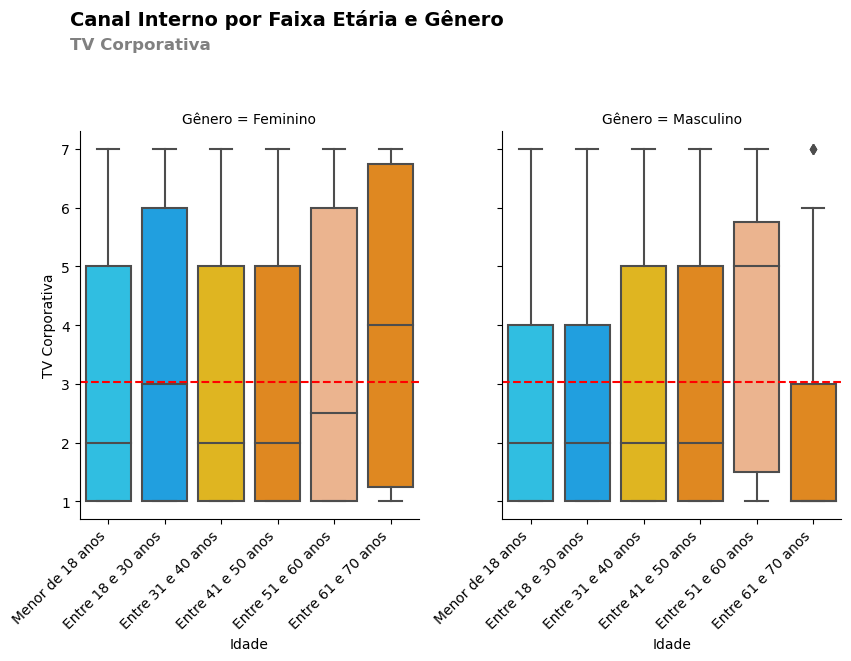

In [56]:
# gráfico boxplot para TV Corporativa por idade e gênero
email = sns.catplot(x="Idade", y="TV Corporativa",
                col="Gênero",
                data=df_idade, kind="box",               
                height=4.8, aspect=0.9)

# Ajuste a posição inicial dos rótulos no eixo x
email.set_xticklabels(rotation=45, ha='right')

# Rotacionar os rótulos do eixo x em 45 graus
for ax in email.axes.flat:
    ax.set_xticks(range(len(ordem_desejada)))
    ax.set_xticklabels(ordem_desejada)
    
    # Adicionar linha pontilhada vermelha para a média
    mean_value = df_idade['TV Corporativa'].mean()
    ax.axhline(mean_value, color='red', linestyle='dashed', linewidth=1.5, label='Média')
    
plt.figtext(0.05, 1.15, 'Canal Interno por Faixa Etária e Gênero', fontsize=14, fontweight='bold', ha='left')
plt.figtext(0.05, 1.10, 'TV Corporativa', fontsize=12, fontweight='bold', color='gray', ha='left')

plt.show()

### Série: percepção de veículo por perfil profissional

Aqui é realizada uma análise que irá comparar a avaliação da prioridade dos diferentes canais de comunicação por tipo de cargo separada em dois eixos: masculino e feminino

Essa análise busca:

- avaliar se há diferenças significativas entre homens e mulheres de faixa etárias similares
- avaliar se há veículos mais adaptados para um determinado cargo em específico
- avaliar se há indícios de um trabalho específico para um determinado grupo

In [57]:
df_plot["Categoria do cargo"].value_counts()

Técnico/administrativo    628
Operacional               350
Universitário             340
Gestão/liderança          238
Aprendiz                   48
Name: Categoria do cargo, dtype: int64

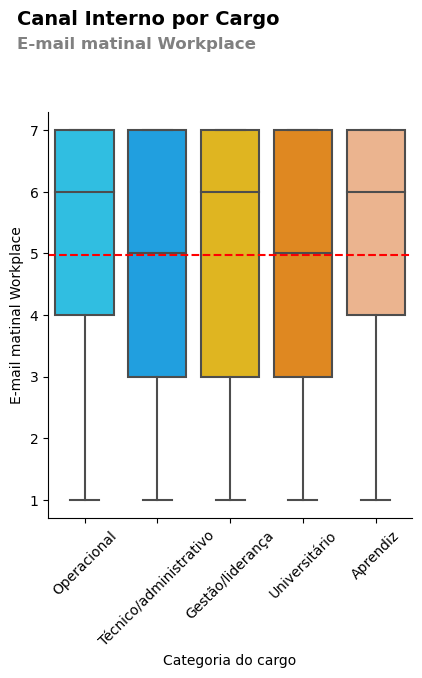

In [58]:
# ordem desejada para todas as séries
ordem_cargo = ['Aprendiz', 'Operacional', 'Técnico/administrativo', 'Universitário', 'Gestão/liderança']

# gráfico boxplot para e-mail por idade e gênero
email = sns.catplot(x="Categoria do cargo", y="E-mail matinal Workplace",
                
                data=df_plot, kind="box",               
                height=4.8, aspect=0.9)

# Rotacionar os rótulos do eixo x em 45 graus
for ax in email.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    # Adicionar linha pontilhada vermelha para a média
    mean_value = df_idade['E-mail matinal Workplace'].mean()
    ax.axhline(mean_value, color='red', linestyle='dashed', linewidth=1.5, label='Média')

# Adicionar título geral e subtítulo
plt.figtext(0.05, 1.15, 'Canal Interno por Cargo', fontsize=14, fontweight='bold', ha='left')
plt.figtext(0.05, 1.10, 'E-mail matinal Workplace', fontsize=12, fontweight='bold', color='gray', ha='left')
 
    
plt.show()

- Não há diferenças significativas

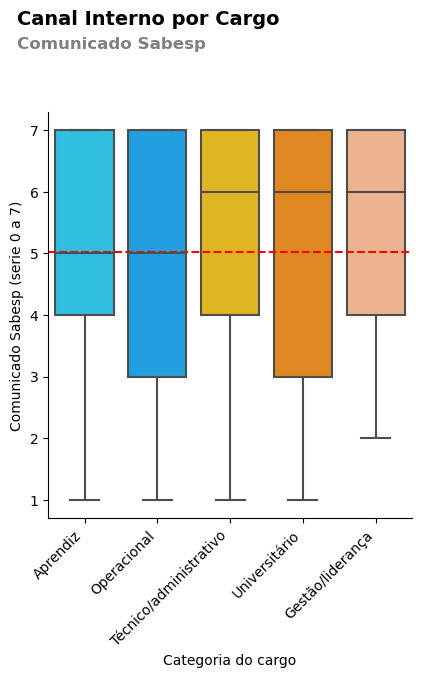

In [59]:
# gráfico boxplot para workplace por idade e gênero
email = sns.catplot(x="Categoria do cargo", y="Comunicado Sabesp (serie 0 a 7)",
                
                data=df_plot, kind="box",               
                height=4.8, aspect=0.9)


# Ajuste a posição inicial dos rótulos no eixo x
email.set_xticklabels(rotation=45, ha='right')

# Rotacionar os rótulos do eixo x em 45 graus
for ax in email.axes.flat:
    ax.set_xticks(range(len(ordem_cargo)))
    ax.set_xticklabels(ordem_cargo)
    
    # Adicionar linha pontilhada vermelha para a média
    mean_value = df_idade['Comunicado Sabesp (serie 0 a 7)'].mean()
    ax.axhline(mean_value, color='red', linestyle='dashed', linewidth=1.5, label='Média')

# Adicionar título geral e subtítulo
plt.figtext(0.05, 1.15, 'Canal Interno por Cargo', fontsize=14, fontweight='bold', ha='left')
plt.figtext(0.05, 1.10, 'Comunicado Sabesp', fontsize=12, fontweight='bold', color='gray', ha='left')
 
    
plt.show()

- O nível operacional tem uma predileção menor por esse veículo 

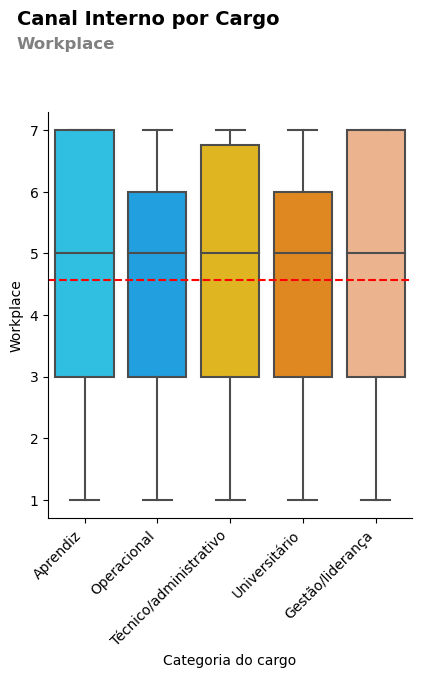

In [60]:
# gráfico boxplot para workplace por idade e gênero
email = sns.catplot(x="Categoria do cargo", y="Workplace",
                
                data=df_plot, kind="box",               
                height=4.8, aspect=0.9)


# Ajuste a posição inicial dos rótulos no eixo x
email.set_xticklabels(rotation=45, ha='right')

# Rotacionar os rótulos do eixo x em 45 graus
for ax in email.axes.flat:
    ax.set_xticks(range(len(ordem_cargo)))
    ax.set_xticklabels(ordem_cargo)
    
    # Adicionar linha pontilhada vermelha para a média
    mean_value = df_idade['Workplace'].mean()
    ax.axhline(mean_value, color='red', linestyle='dashed', linewidth=1.5, label='Média')

# Adicionar título geral e subtítulo
plt.figtext(0.05, 1.15, 'Canal Interno por Cargo', fontsize=14, fontweight='bold', ha='left')
plt.figtext(0.05, 1.10, 'Workplace', fontsize=12, fontweight='bold', color='gray', ha='left')
 
    
plt.show()

- IMPORTANTE: não há diferenças significativas entre o nível operacional, técnico e universitário em relação ao Workplace

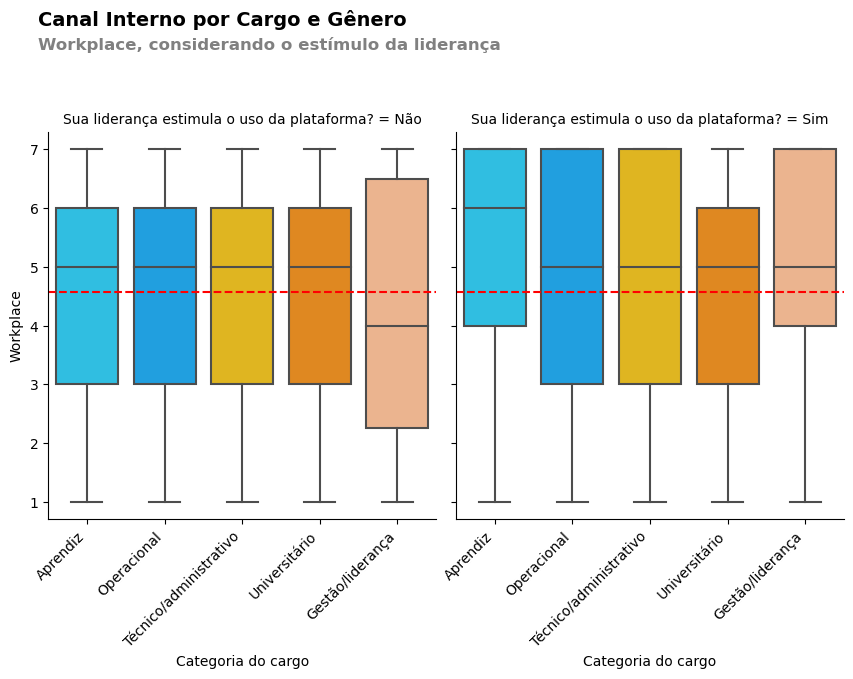

In [61]:
# gráfico boxplot para Comunicado Sabesp por idade e gênero
email = sns.catplot(x="Categoria do cargo", y="Workplace",
                col="Sua liderança estimula o uso da plataforma?",
                data=df_plot, kind="box",               
                height=4.8, aspect=0.9)

# Ajuste a posição inicial dos rótulos no eixo x
email.set_xticklabels(rotation=45, ha='right')

# Rotacionar os rótulos do eixo x em 45 graus
for ax in email.axes.flat:
    ax.set_xticks(range(len(ordem_cargo)))
    ax.set_xticklabels(ordem_cargo)
    
    # Adicionar linha pontilhada vermelha para a média
    mean_value = df_idade['Workplace'].mean()
    ax.axhline(mean_value, color='red', linestyle='dashed', linewidth=1.5, label='Média')


# Adicionar título geral e subtítulo
plt.figtext(0.05, 1.15, 'Canal Interno por Cargo e Gênero', fontsize=14, fontweight='bold', ha='left')
plt.figtext(0.05, 1.10, 'Workplace, considerando o estímulo da liderança', fontsize=12, fontweight='bold', color='gray', ha='left')
 
    
plt.show()

C:\Users\gwestin\AppData\Local\Temp\ipykernel_11652\1637832110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot1.rename(columns = {'Sua liderança utiliza o Workplace para se comunicar com a equipe de trabalho' : 'Liderança utiliza'}, inplace=True)


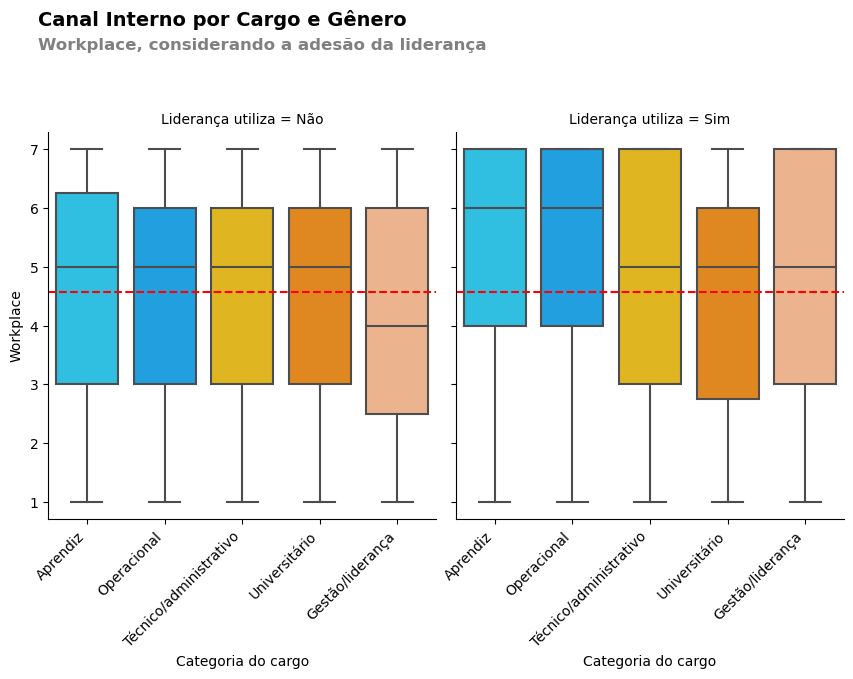

In [62]:
df_plot1 = df_plot
df_plot1.rename(columns = {'Sua liderança utiliza o Workplace para se comunicar com a equipe de trabalho' : 'Liderança utiliza'}, inplace=True)

# gráfico boxplot para Comunicado Sabesp por idade e gênero
email = sns.catplot(x="Categoria do cargo", y="Workplace",
                col="Liderança utiliza",
                data=df_plot1, kind="box",               
                height=4.8, aspect=0.9)

# Ajuste a posição inicial dos rótulos no eixo x
email.set_xticklabels(rotation=45, ha='right')

# Rotacionar os rótulos do eixo x em 45 graus
for ax in email.axes.flat:
    ax.set_xticks(range(len(ordem_cargo)))
    ax.set_xticklabels(ordem_cargo)
    
    # Adicionar linha pontilhada vermelha para a média
    mean_value = df_idade['Workplace'].mean()
    ax.axhline(mean_value, color='red', linestyle='dashed', linewidth=1.5, label='Média')


# Adicionar título geral e subtítulo
plt.figtext(0.05, 1.15, 'Canal Interno por Cargo e Gênero', fontsize=14, fontweight='bold', ha='left')
plt.figtext(0.05, 1.10, 'Workplace, considerando a adesão da liderança', fontsize=12, fontweight='bold', color='gray', ha='left')
 
    
plt.show()

**IMPORTANTE**

- A percepção de prioridade da plataforma é bastante modificada dependendo do comportamento da liderança, tanto se ela USA o workplace, como se ela estímula o uso 

- No nível operacional isso é especialmente marcante

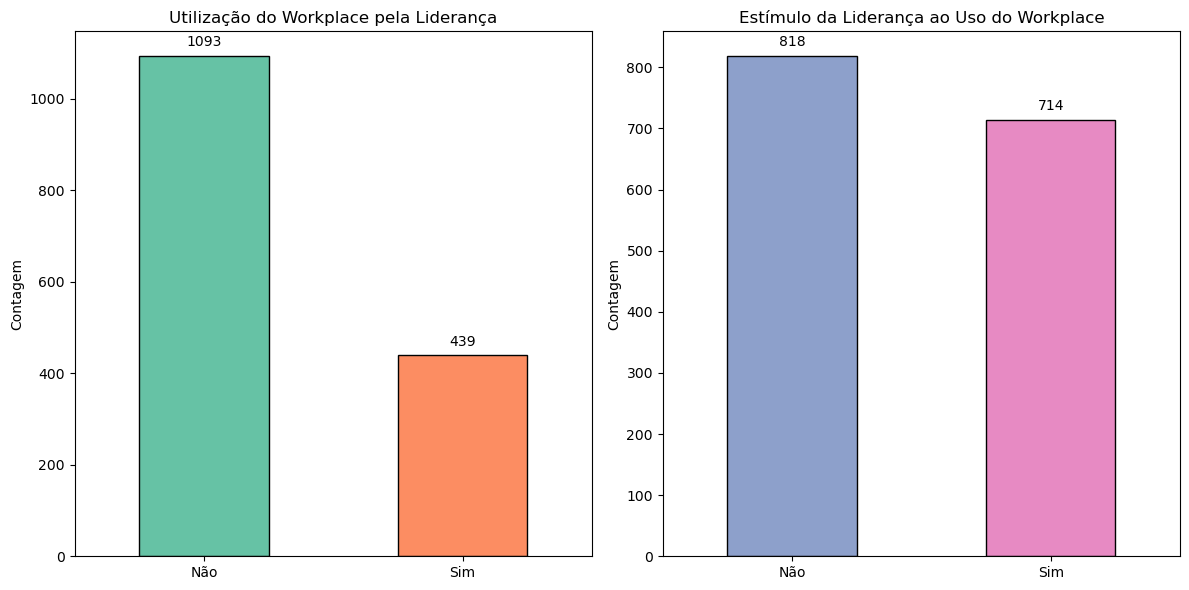

In [63]:
# Contagens das respostas para a primeira pergunta
count1 = df_plot['Liderança utiliza'].value_counts()

# Contagens das respostas para a segunda pergunta
count2 = df_plot['Sua liderança estimula o uso da plataforma?'].value_counts()

# Criar figura e eixos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico de barras para a primeira pergunta
colors1 = sns.color_palette("Set2")[:2]
count1.plot(kind='bar', ax=axes[0], color=colors1, edgecolor='black')
axes[0].set_title('Utilização do Workplace pela Liderança')
axes[0].set_ylabel('Contagem')
axes[0].set_xticklabels(count1.index, rotation=0, ha='center')

# Adicionar rótulos nas barras
for p in axes[0].patches:
    axes[0].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Gráfico de barras para a segunda pergunta
colors2 = sns.color_palette("Set2")[2:4]
count2.plot(kind='bar', ax=axes[1], color=colors2, edgecolor='black')
axes[1].set_title('Estímulo da Liderança ao Uso do Workplace')
axes[1].set_ylabel('Contagem')
axes[1].set_xticklabels(count2.index, rotation=0, ha='center')

# Adicionar rótulos nas barras
for p in axes[1].patches:
    axes[1].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Ajustar layout
plt.tight_layout()
plt.show()

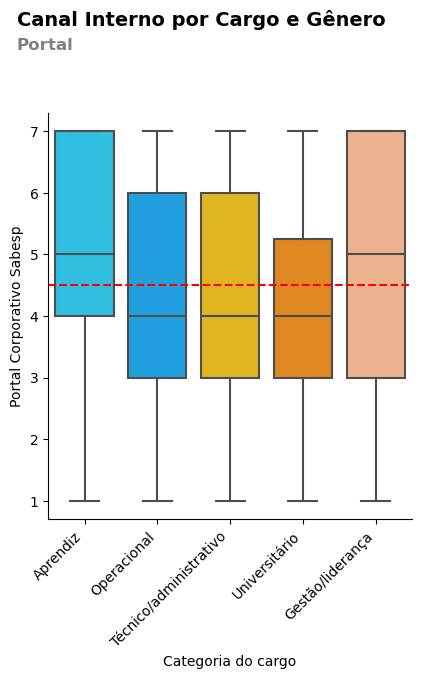

In [64]:
# gráfico boxplot para Portal por idade e gênero
email = sns.catplot(x="Categoria do cargo", y="Portal Corporativo Sabesp",
                
                data=df_plot, kind="box",               
                height=4.8, aspect=0.9)

# Ajuste a posição inicial dos rótulos no eixo x
email.set_xticklabels(rotation=45, ha='right')

# Rotacionar os rótulos do eixo x em 45 graus
for ax in email.axes.flat:
    ax.set_xticks(range(len(ordem_cargo)))
    ax.set_xticklabels(ordem_cargo)
    
    # Adicionar linha pontilhada vermelha para a média
    mean_value = df_idade['Portal Corporativo Sabesp'].mean()
    ax.axhline(mean_value, color='red', linestyle='dashed', linewidth=1.5, label='Média')


# Adicionar título geral e subtítulo
plt.figtext(0.05, 1.15, 'Canal Interno por Cargo e Gênero', fontsize=14, fontweight='bold', ha='left')
plt.figtext(0.05, 1.10, 'Portal', fontsize=12, fontweight='bold', color='gray', ha='left')
 
    
plt.show()

- A liderança dá uma importância maior ao portal do que o restante do corpo de trabalho. É bastante desproporcional

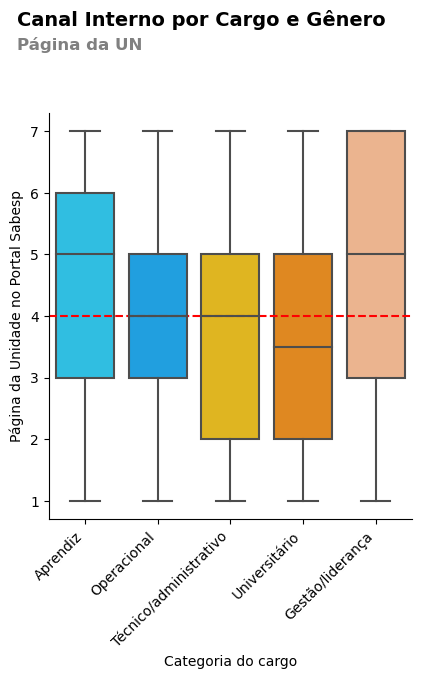

In [65]:
# gráfico boxplot para Página da Unidade por idade e gênero
email = sns.catplot(x="Categoria do cargo", y="Página da Unidade no Portal Sabesp",
                
                data=df_plot, kind="box",               
                height=4.8, aspect=0.9)

# Ajuste a posição inicial dos rótulos no eixo x
email.set_xticklabels(rotation=45, ha='right')

# Rotacionar os rótulos do eixo x em 45 graus
for ax in email.axes.flat:
    ax.set_xticks(range(len(ordem_cargo)))
    ax.set_xticklabels(ordem_cargo)
    
    # Adicionar linha pontilhada vermelha para a média
    mean_value = df_idade['Página da Unidade no Portal Sabesp'].mean()
    ax.axhline(mean_value, color='red', linestyle='dashed', linewidth=1.5, label='Média')


# Adicionar título geral e subtítulo
plt.figtext(0.05, 1.15, 'Canal Interno por Cargo e Gênero', fontsize=14, fontweight='bold', ha='left')
plt.figtext(0.05, 1.10, 'Página da UN', fontsize=12, fontweight='bold', color='gray', ha='left')
 
    
plt.show()

- O mesmo padrão se repete. Pode indicar certo apego ao instrumento.

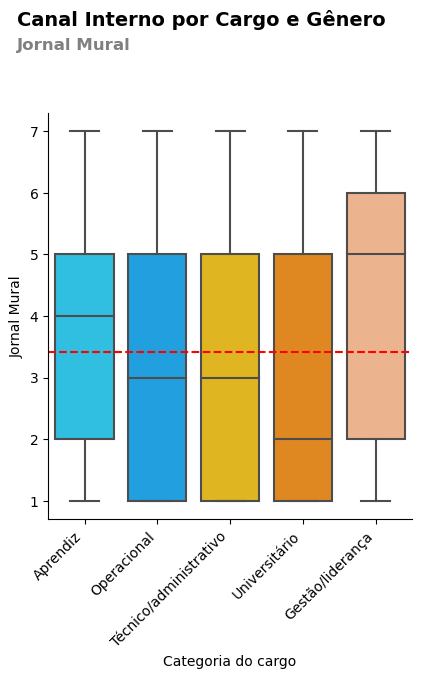

In [66]:
# gráfico boxplot para Jornal Mural por idade e gênero
email = sns.catplot(x="Categoria do cargo", y="Jornal Mural",
                
                data=df_plot, kind="box",               
                height=4.8, aspect=0.9)

# Ajuste a posição inicial dos rótulos no eixo x
email.set_xticklabels(rotation=45, ha='right')

# Rotacionar os rótulos do eixo x em 45 graus
for ax in email.axes.flat:
    ax.set_xticks(range(len(ordem_cargo)))
    ax.set_xticklabels(ordem_cargo)
    
    # Adicionar linha pontilhada vermelha para a média
    mean_value = df_idade['Jornal Mural'].mean()
    ax.axhline(mean_value, color='red', linestyle='dashed', linewidth=1.5, label='Média')


# Adicionar título geral e subtítulo
plt.figtext(0.05, 1.15, 'Canal Interno por Cargo e Gênero', fontsize=14, fontweight='bold', ha='left')
plt.figtext(0.05, 1.10, 'Jornal Mural', fontsize=12, fontweight='bold', color='gray', ha='left')
 
    
plt.show()

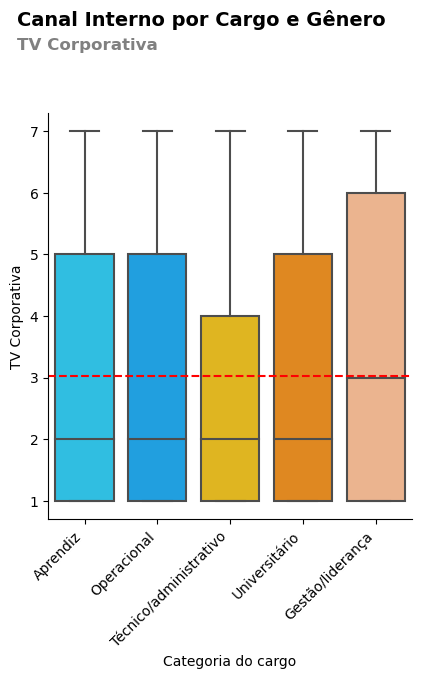

In [67]:
# gráfico boxplot para TV Corporativa por idade e gênero
email = sns.catplot(x="Categoria do cargo", y="TV Corporativa",
                
                data=df_plot, kind="box",               
                height=4.8, aspect=0.9)

# Ajuste a posição inicial dos rótulos no eixo x
email.set_xticklabels(rotation=45, ha='right')

# Rotacionar os rótulos do eixo x em 45 graus
for ax in email.axes.flat:
    ax.set_xticks(range(len(ordem_cargo)))
    ax.set_xticklabels(ordem_cargo)
    
    # Adicionar linha pontilhada vermelha para a média
    mean_value = df_idade['TV Corporativa'].mean()
    ax.axhline(mean_value, color='red', linestyle='dashed', linewidth=1.5, label='Média')


# Adicionar título geral e subtítulo
plt.figtext(0.05, 1.15, 'Canal Interno por Cargo e Gênero', fontsize=14, fontweight='bold', ha='left')
plt.figtext(0.05, 1.10, 'TV Corporativa', fontsize=12, fontweight='bold', color='gray', ha='left')
 
    
plt.show()

### Análise de Correlação das variáveis numéricas

Aqui a intenção é entender se alguma variável está impactando de forma direta outra variável. A escala utilizada é o coeficiente de pearson e indica correlações médias a partir de |0,5| e forte a partir de |0,8|, ambas em módulo. 

A transformação de algumas categóricas em variáveis dumbies permitem uma análise estendida.

In [68]:
# criar data frame entre serie numérica 1 e perfil
# usei um join left e right pq não construi um índice em comum, mas não alterei o frame 
# CHECAR SE EU NÃO FIZ MERDA ELIMINANDO LINHAS DIFERENTES
num_profile = pd.merge(dfnum_serie1, df_profile, left_index=True, right_index=True)

In [69]:
# retirar o peso na consciência
print(num_profile.shape, dfnum_serie1.shape, df_profile.shape)

(1615, 14) (1615, 7) (1615, 7)


In [70]:
num_profile.columns

Index(['Comunicado Sabesp (serie 0 a 7)', 'E-mail matinal Workplace',
       'Jornal Mural', 'Página da Unidade no Portal Sabesp',
       'Portal Corporativo Sabesp', 'TV Corporativa', 'Workplace', 'Idade',
       'Gênero', 'Categoria do cargo', 'Sigla da UN',
       'Tempo de atuação na Sabesp', 'diretoria', 'sup'],
      dtype='object')

In [71]:
# preparar dados para matriz de correlação

# Criar novas colunas dummy
colunas_dummy = pd.get_dummies(df[['Gênero', 'Categoria do cargo']])

# Concatenar as colunas dummy com o DataFrame original
df_com_dummy = pd.concat([num_profile, colunas_dummy], axis=1)

# Remover as colunas categóricas originais
df_com_dummy = df_com_dummy.drop(['Idade', 'Gênero', 'Categoria do cargo','diretoria','sup',], axis=1)
df_com_dummy = df_com_dummy.drop(['Gênero_Prefiro não responder', 'Gênero_Outro. Qual?', 'Sigla da UN', 'Tempo de atuação na Sabesp'], axis=1)

In [72]:
df_com_dummy

,Comunicado Sabesp (serie 0 a 7),E-mail matinal Workplace,Jornal Mural,Página da Unidade no Portal Sabesp,Portal Corporativo Sabesp,TV Corporativa,Workplace,Gênero_Feminino,Gênero_Masculino,Categoria do cargo_Aprendiz,Categoria do cargo_Gestão/liderança,Categoria do cargo_Operacional,Categoria do cargo_Técnico/administrativo,Categoria do cargo_Universitário
0,6,7,4,2,3,1,5,1,0,0,0,1,0,0
1,4,5,2,3,1,6,7,0,1,0,0,0,1,0
2,7,7,1,1,5,1,5,0,1,0,0,1,0,0
3,6,5,5,7,7,2,1,0,1,0,0,1,0,0
4,7,6,6,7,7,5,6,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,7,6,1,4,2,3,5,1,0,0,0,0,0,1
1611,2,3,6,5,4,7,1,1,0,0,0,0,0,1
1612,1,2,6,7,4,5,3,1,0,0,0,0,0,1
1613,7,6,2,3,4,1,5,1,0,0,0,0,1,0


In [73]:
# matriz de correlação bruta
matrizcorrelacao = df_com_dummy.corr()

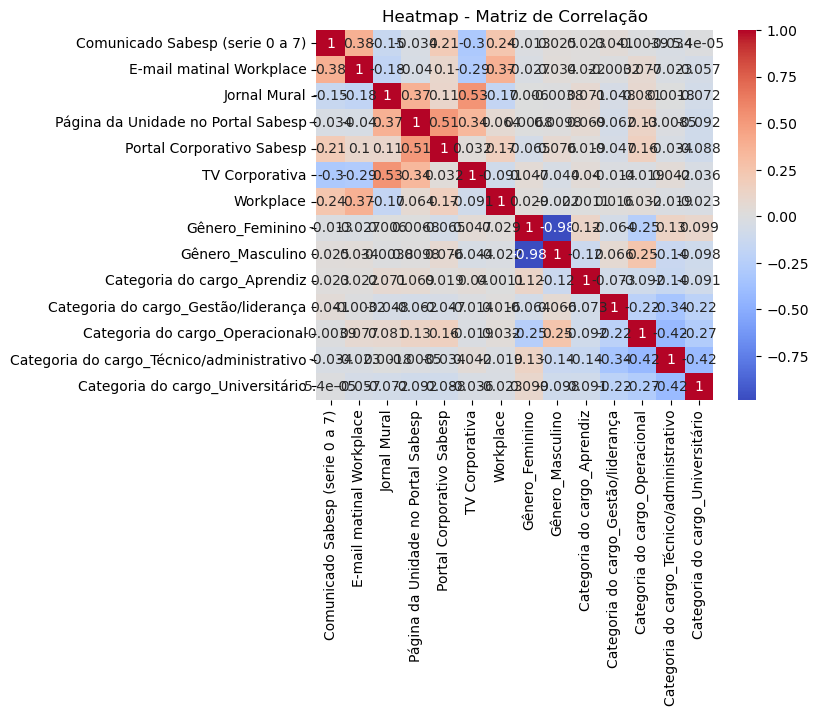

<Figure size 1500x600 with 0 Axes>

In [74]:
sns.heatmap(matrizcorrelacao, annot=True, cmap='coolwarm')
plt.title('Heatmap - Matriz de Correlação')
plt.figure(figsize=(15, 6))
plt.show();

### Série de canais internos por diretoria

Aqui é realizada uma análise que irá comparar a avaliação da prioridade dos diferentes canais de comunicação por diretoria. Optou-se por permanecer com a estrutura de M e R. 

Essa análise busca:

- avaliar se há diferenças significativas entre as diretorias administrativas e operacionais
- avaliar se há veículos mais adaptados para um determinado tipo de trabalho / atividade

In [75]:
# ajuste df profile (retirando diretorias ~ desejáveis)
# Lista de valores permitidos na coluna 'diretoria'
lista_permitida = ['R', 'M', 'P', 'F', 'K', 'C', 'T']
lista_gênero = ['Masculino', 'Feminino']

# Filtrar o DataFrame para manter apenas as linhas com valores na lista permitida
df_dir = num_profile[num_profile['diretoria'].isin(lista_permitida)]
df_dir = df_dir[num_profile['Gênero'].isin(lista_gênero)]

# definir ordem desejada de display
ordem_diretoria = ['M', 'R', 'C', 'T', 'F', 'P', 'K']

# Exemplo de exibição do DataFrame resultante
print(df_dir.diretoria.value_counts())

M    714
R    585
C    101
T     74
F     60
P     47
K     16
Name: diretoria, dtype: int64


C:\Users\gwestin\AppData\Local\Temp\ipykernel_11652\2017049205.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dir = df_dir[num_profile['Gênero'].isin(lista_gênero)]


In [76]:
# plotar colunas que serão usadas para as séries
dfnum_serie1.columns

Index(['Comunicado Sabesp (serie 0 a 7)', 'E-mail matinal Workplace',
       'Jornal Mural', 'Página da Unidade no Portal Sabesp',
       'Portal Corporativo Sabesp', 'TV Corporativa', 'Workplace'],
      dtype='object')

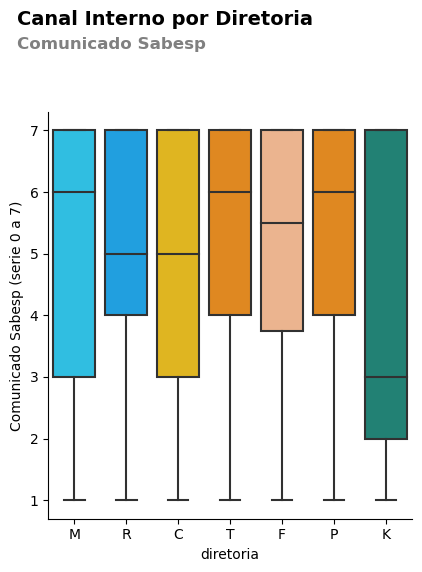

In [77]:
# gráfico boxplot para Comunicado Sabesp por diretoria
email = sns.catplot(x="diretoria", y="Comunicado Sabesp (serie 0 a 7)",
                data=df_dir, kind="box",               
                height=4.8, aspect=0.9)

# Definição de ordem para o eixo x
for ax in email.axes.flat:
    ax.set_xticks(range(len(ordem_diretoria)))
    ax.set_xticklabels(ordem_diretoria)


# Adicionar título geral e subtítulo
plt.figtext(0.05, 1.15, 'Canal Interno por Diretoria', fontsize=14, fontweight='bold', ha='left')
plt.figtext(0.05, 1.10, 'Comunicado Sabesp', fontsize=12, fontweight='bold', color='gray', ha='left')
 
    
plt.show()

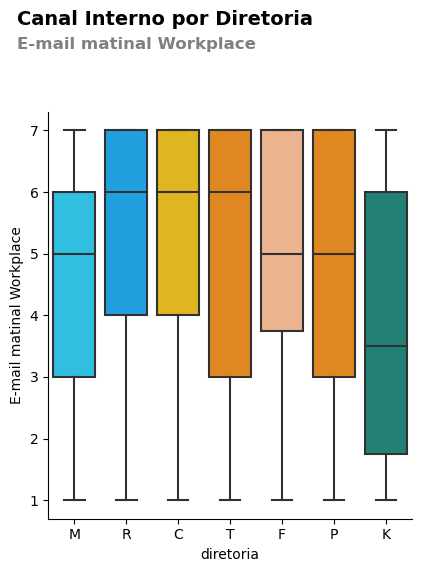

In [78]:
# gráfico boxplot para E-mail matinal Workplace por diretoria
email = sns.catplot(x="diretoria", y="E-mail matinal Workplace",
                data=df_dir, kind="box",               
                height=4.8, aspect=0.9)

# Definição de ordem para o eixo x
for ax in email.axes.flat:
    ax.set_xticks(range(len(ordem_diretoria)))
    ax.set_xticklabels(ordem_diretoria)


# Adicionar título geral e subtítulo
plt.figtext(0.05, 1.15, 'Canal Interno por Diretoria', fontsize=14, fontweight='bold', ha='left')
plt.figtext(0.05, 1.10, 'E-mail matinal Workplace', fontsize=12, fontweight='bold', color='gray', ha='left')
 
    
plt.show()

- A M parece preferir o comunicado
- A K sustenta um comportamento de indiferença a esses veículos por e-mail
- Não há um comportamento claro em relação as diretorias adm

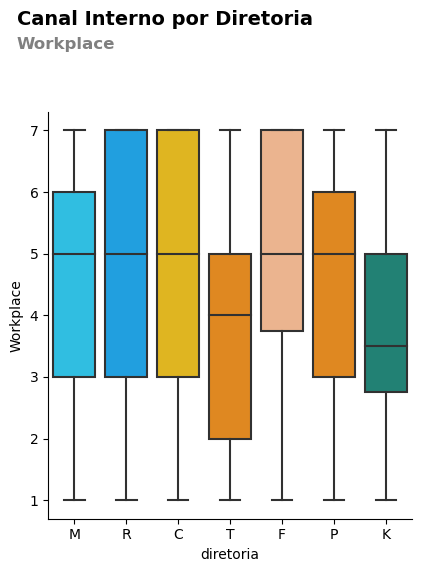

In [79]:
# gráfico boxplot para E-mail matinal Workplace por diretoria
email = sns.catplot(x="diretoria", y="Workplace",
                data=df_dir, kind="box",               
                height=4.8, aspect=0.9)

# Definição de ordem para o eixo x
for ax in email.axes.flat:
    ax.set_xticks(range(len(ordem_diretoria)))
    ax.set_xticklabels(ordem_diretoria)


# Adicionar título geral e subtítulo
plt.figtext(0.05, 1.15, 'Canal Interno por Diretoria', fontsize=14, fontweight='bold', ha='left')
plt.figtext(0.05, 1.10, 'Workplace', fontsize=12, fontweight='bold', color='gray', ha='left')
 
    
plt.show()

- Apresenta um comportamento bem distinto por diretoria, principalmente T, K e, em menor intensidade P
- F é a unidade mais aderente

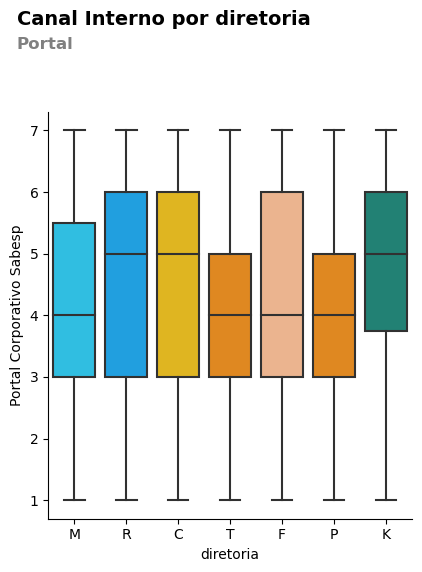

In [80]:
# gráfico boxplot para Portal Corporativo Sabesp por diretoria
email = sns.catplot(x="diretoria", y="Portal Corporativo Sabesp",
                data=df_dir, kind="box",               
                height=4.8, aspect=0.9)

# Definição de ordem para o eixo x
for ax in email.axes.flat:
    ax.set_xticks(range(len(ordem_diretoria)))
    ax.set_xticklabels(ordem_diretoria)


# Adicionar título geral e subtítulo
plt.figtext(0.05, 1.15, 'Canal Interno por diretoria', fontsize=14, fontweight='bold', ha='left')
plt.figtext(0.05, 1.10, 'Portal', fontsize=12, fontweight='bold', color='gray', ha='left')
 
    
plt.show()

- A visão da K novamente destoa. 
- A M parece não ter comportamento semelhante a R

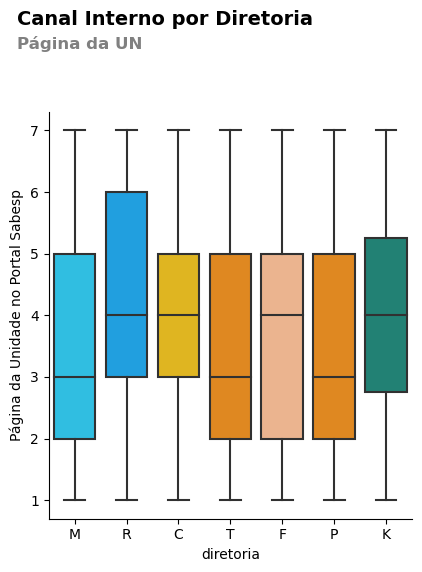

In [81]:
# gráfico boxplot para Página da Unidade no Portal Sabesp por diretoria
email = sns.catplot(x="diretoria", y="Página da Unidade no Portal Sabesp",
                data=df_dir, kind="box",               
                height=4.8, aspect=0.9)

# Definição de ordem para o eixo x
for ax in email.axes.flat:
    ax.set_xticks(range(len(ordem_diretoria)))
    ax.set_xticklabels(ordem_diretoria)


# Adicionar título geral e subtítulo
plt.figtext(0.05, 1.15, 'Canal Interno por Diretoria', fontsize=14, fontweight='bold', ha='left')
plt.figtext(0.05, 1.10, 'Página da UN', fontsize=12, fontweight='bold', color='gray', ha='left')
 
    
plt.show()

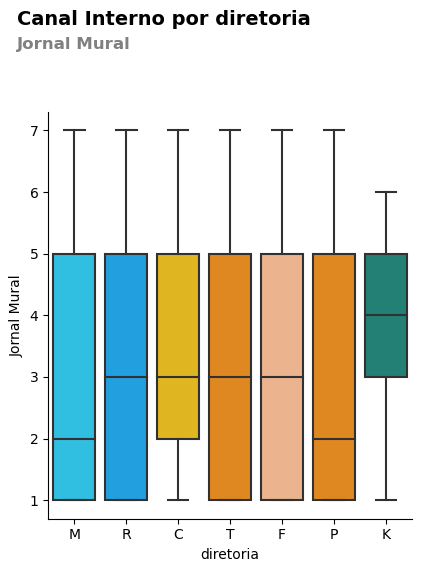

In [82]:
# gráfico boxplot para Jornal Mural por diretoria
email = sns.catplot(x="diretoria", y="Jornal Mural",
                data=df_dir, kind="box",               
                height=4.8, aspect=0.9)

# Definição de ordem para o eixo x
for ax in email.axes.flat:
    ax.set_xticks(range(len(ordem_diretoria)))
    ax.set_xticklabels(ordem_diretoria)

    
# Adicionar título geral e subtítulo
plt.figtext(0.05, 1.15, 'Canal Interno por diretoria', fontsize=14, fontweight='bold', ha='left')
plt.figtext(0.05, 1.10, 'Jornal Mural', fontsize=12, fontweight='bold', color='gray', ha='left')
 
    
plt.show()

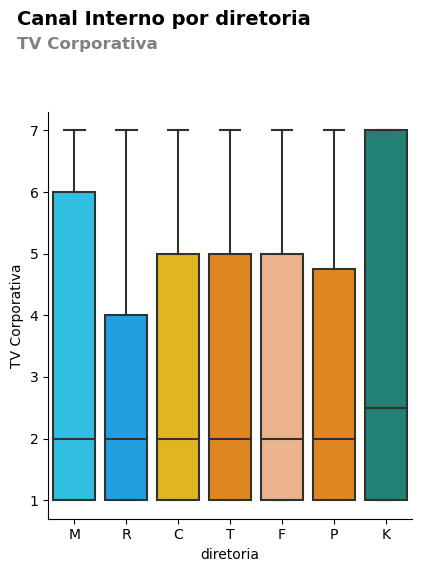

In [83]:
# gráfico boxplot para TV Corporativa por diretoria
email = sns.catplot(x="diretoria", y="TV Corporativa", 
                data=df_dir, kind="box",               
                height=4.8, aspect=0.9)

# Definição de ordem para o eixo x
for ax in email.axes.flat:
    ax.set_xticks(range(len(ordem_diretoria)))
    ax.set_xticklabels(ordem_diretoria)


# Adicionar título geral e subtítulo
plt.figtext(0.05, 1.15, 'Canal Interno por diretoria', fontsize=14, fontweight='bold', ha='left')
plt.figtext(0.05, 1.10, 'TV Corporativa', fontsize=12, fontweight='bold', color='gray', ha='left')
 
    
plt.show()

- Está consolidada a não pertinência da TV Corporativa para todos os públicos

## Análise dos atributos da comunicação interna

In [84]:
df_plot.head()

,respondent_id,Idade,Gênero,Categoria do cargo,Sigla da UN,Tempo de atuação na Sabesp,"Quando se fala em veículo de Comunicação Interna Corporativa (Sabesp), qual é o 1° que você se lembra?",Comunicado Sabesp (serie 0 a 7),E-mail matinal Workplace,Jornal Mural,...,Comente sua resposta,Liderança utiliza,Sua liderança estimula o uso da plataforma?,Que sugestões você tem para melhorar a adoção e o uso do Workplace na Sabesp?,É ágil (serie 0 a 5),Conteúdo divulgado é suficiente e claro,Dá visibilidade para as atividades e projetos relacionados ao meu trabalho.,Que sugestões você tem para melhorar a comunicação interna na empresa?,Qual o seu nível de satisfação com a Comunicação Interna Sabesp?,Comente sua resposta.1
0,118468263987,Entre 31 e 40 anos,Feminino,Operacional,PIRITUBA,Menos de 5 anos,workplace,6,7,4,...,NaN,Não,Não,NaN,1.0,1.0,1.0,NaN,1.0,NaN
1,118467766286,Entre 51 e 60 anos,Masculino,Técnico/administrativo,RSTE 05,De 26 a 30 anos,JORNAL MURAL,4,5,2,...,NaN,Não,Não,NaN,3.0,3.0,3.0,NaN,3.0,NaN
2,118467726771,Entre 51 e 60 anos,Masculino,Operacional,MSBR 11,De 11 a 15 anos,email,7,7,1,...,NaN,Sim,Sim,NaN,4.0,4.0,4.0,NaN,4.0,NaN
3,118467347245,Entre 51 e 60 anos,Masculino,Operacional,RADI 01,De 21 a 25 anos,intrnet,6,5,5,...,sim,Sim,Sim,sem sugestões,4.0,4.0,4.0,não,4.0,sem comntario
4,118467121882,Entre 61 e 70 anos,Masculino,Operacional,MATC 01,De 21 a 25 anos,SAP,7,6,6,...,NaN,Não,Não,Ser mais evidenciado com assuntos pertinentes ...,4.0,4.0,4.0,Envolver mais os colaboradores através da disp...,4.0,NaN


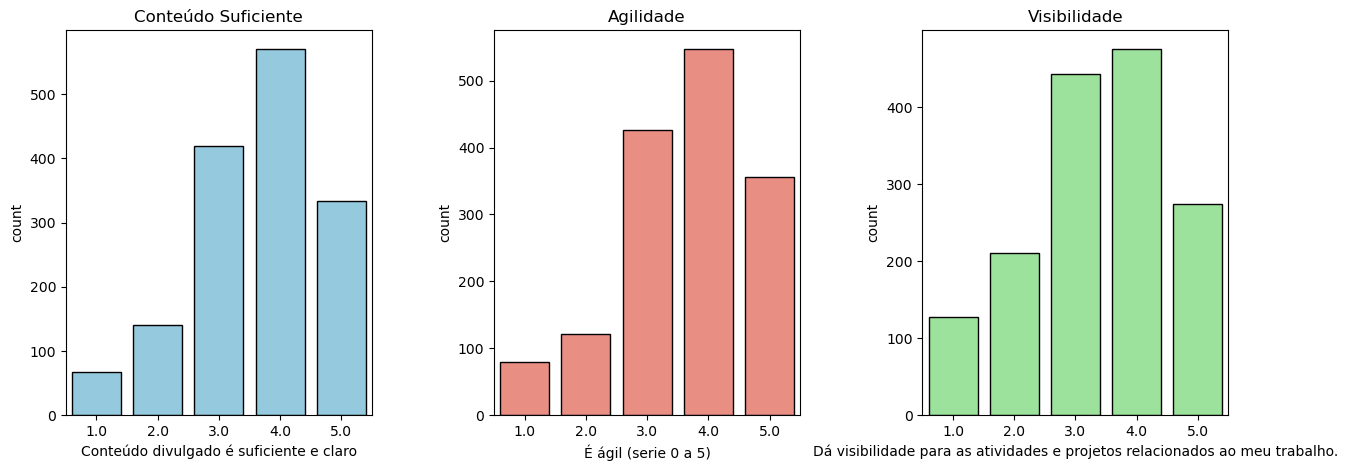

In [85]:
#Gráfico conjunto dos atributos

# Criar figura e eixos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Gráfico de barras para 'Conteúdo divulgado é suficiente e claro'
sns.countplot(x='Conteúdo divulgado é suficiente e claro', data=df_plot, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Conteúdo Suficiente')

# Gráfico de barras para 'É ágil (serie 0 a 5)'
sns.countplot(x='É ágil (serie 0 a 5)', data=df_plot, ax=axes[1], color='salmon', edgecolor='black')
axes[1].set_title('Agilidade')

# Gráfico de barras para 'Dá visibilidade para as atividades e projetos relacionados ao meu trabalho.'
sns.countplot(x='Dá visibilidade para as atividades e projetos relacionados ao meu trabalho.', data=df_plot, ax=axes[2], color='lightgreen', edgecolor='black')
axes[2].set_title('Visibilidade')

# Ajustar layout manualmente
plt.subplots_adjust(wspace=0.4)

# Mostrar o gráfico
plt.show()


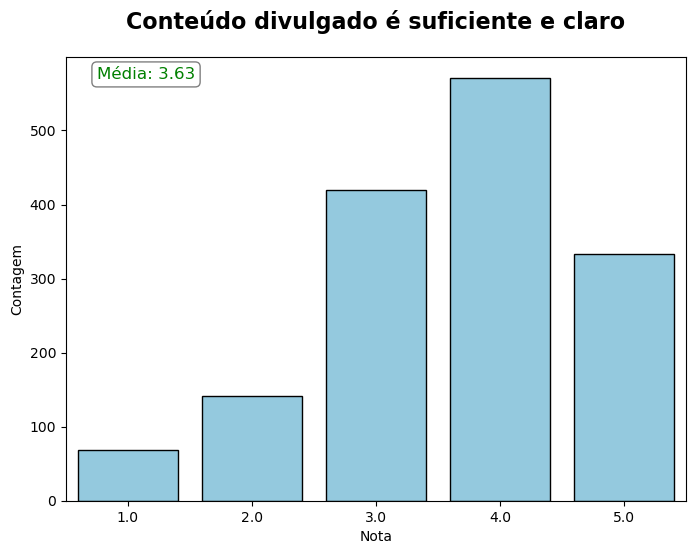

In [86]:
# Gráfico para atributos

# Contagens das notas
contagem_notas = df_plot['Conteúdo divulgado é suficiente e claro'].value_counts()

# Média das notas
media_notas = df_plot['Conteúdo divulgado é suficiente e claro'].mean()

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(8, 6))

# Gráfico de barras
sns.countplot(x='Conteúdo divulgado é suficiente e claro', data=df_plot, ax=ax, color='skyblue', edgecolor='black')

# Ajustar título
ax.set_title('Conteúdo divulgado é suficiente e claro', fontsize=16, fontweight='bold', pad=20)

# Adicionar rótulos
ax.set_xlabel('Nota')
ax.set_ylabel('Contagem')

# Adicionar caixa de diálogo com a média no canto superior esquerdo
bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="grey", facecolor="white")
ax.text(0.05, 0.95, f'Média: {media_notas:.2f}', fontsize=12, color='green', bbox=bbox_props, transform=ax.transAxes)

# Ajustar layout manualmente
plt.subplots_adjust(top=0.85)

# Mostrar o gráfico
plt.show()



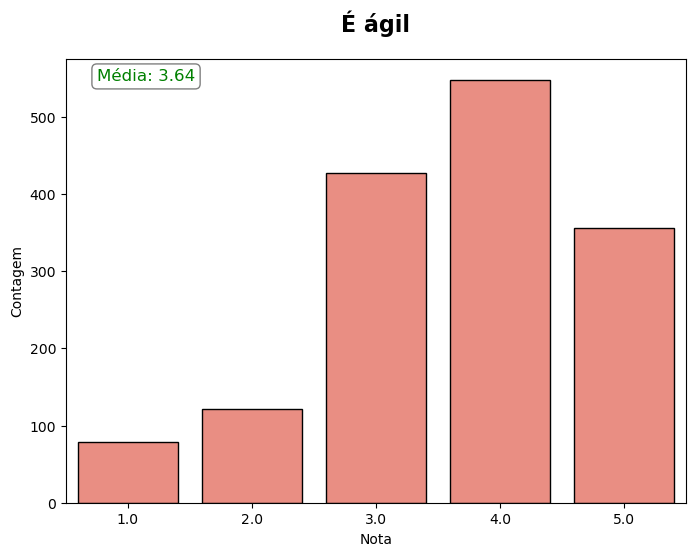

In [87]:
# Gráfico para atributos

# Contagens das notas
contagem_notas = df_plot['É ágil (serie 0 a 5)'].value_counts()

# Média das notas
media_notas = df_plot['É ágil (serie 0 a 5)'].mean()

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(8, 6))

# Gráfico de barras
sns.countplot(x='É ágil (serie 0 a 5)', data=df_plot, ax=ax, color='salmon', edgecolor='black')

# Ajustar título
ax.set_title('É ágil', fontsize=16, fontweight='bold', pad=20)

# Adicionar rótulos
ax.set_xlabel('Nota')
ax.set_ylabel('Contagem')

# Adicionar caixa de diálogo com a média no canto superior esquerdo
bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="grey", facecolor="white")
ax.text(0.05, 0.95, f'Média: {media_notas:.2f}', fontsize=12, color='green', bbox=bbox_props, transform=ax.transAxes)

# Ajustar layout manualmente
plt.subplots_adjust(top=0.85)

# Mostrar o gráfico
plt.show()


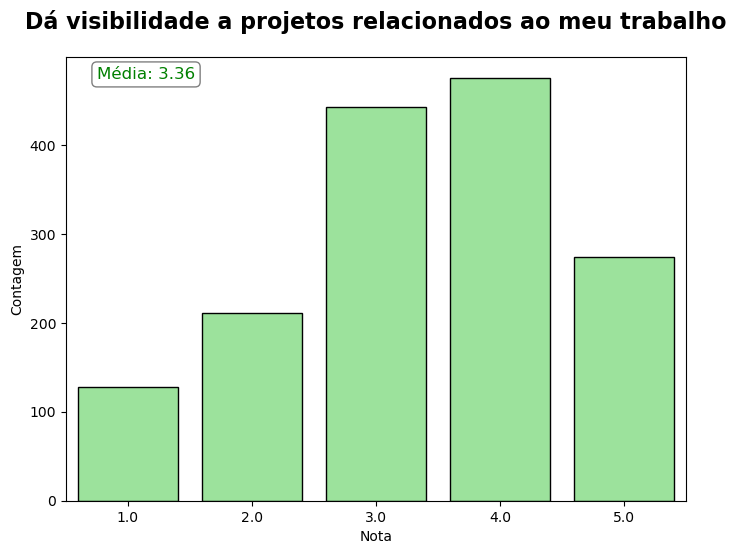

In [88]:
# Gráfico para atributos

# Contagens das notas
contagem_notas = df_plot['Dá visibilidade para as atividades e projetos relacionados ao meu trabalho.'].value_counts()

# Média das notas
media_notas = df_plot['Dá visibilidade para as atividades e projetos relacionados ao meu trabalho.'].mean()

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(8, 6))

# Gráfico de barras
sns.countplot(x='Dá visibilidade para as atividades e projetos relacionados ao meu trabalho.', data=df_plot, ax=ax, color='lightgreen', edgecolor='black')

# Ajustar título
ax.set_title('Dá visibilidade a projetos relacionados ao meu trabalho', fontsize=16, fontweight='bold', pad=20)

# Adicionar rótulos
ax.set_xlabel('Nota')
ax.set_ylabel('Contagem')

# Adicionar caixa de diálogo com a média no canto superior esquerdo
bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="grey", facecolor="white")
ax.text(0.05, 0.95, f'Média: {media_notas:.2f}', fontsize=12, color='green', bbox=bbox_props, transform=ax.transAxes)

# Ajustar layout manualmente
plt.subplots_adjust(top=0.85)

# Mostrar o gráfico
plt.show()


## Análise de respostas abertas

In [89]:
# 19. Existem outros meios de comunicação que você utiliza para se manter informado sobre a Sabesp ou suas atividades?
count_true = (df['Existem outros meios de comunicação que você utiliza para se manter informado sobre a Sabesp ou suas atividades?'] == 'Sim.').sum()
print(f'Quantidade de respostas sim: {count_true}')

Quantidade de respostas sim: 620


In [90]:
# exibição de nuvens de palavras para a pergunta subsequente: 20. Quais?
df_quais = df.dropna(subset=['Quais?'])
df_quais = df_quais['Quais?']
df_quais.count()

633

In [91]:
# caso seja necessário instalar as bibliotecas 
# !pip install wordcloud
# !pip install spacy


In [92]:
from wordcloud import WordCloud
import spacy

# Supondo que 'df_quais' seja o seu dataframe e 'Quais' seja o nome real da coluna
# Certifique-se de substituir 'Quais' pelo nome real da sua coluna
# deixei tudo como string e tudo como lower para evitar erros ou repetições não desejadas
text = ' '.join(df_quais.astype(str).str.lower())

# Processamento de texto com Spacy
nlp = spacy.load('pt_core_news_sm')
# Transformação do texto em documento
doc = nlp(text)

# Filtrando palavras relevantes (substantivos, adjetivos, etc.) e removendo stopwords
relevant_words = [token.text for token in doc if token.is_alpha and not token.is_stop]

# Criando a nuvem de palavras com WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(relevant_words))

# Exibindo a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


OSError: [E050] Can't find model 'pt_core_news_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
# 10: Em ordem de prioridade de 1 a 7,  onde 1 é menos eficaz e 7 é mais eficaz, quais ferramentas você considera mais eficazes para se manter informado?
# 18: Comente sua resposta:

# quantidade de valores não nulos
df['Comente sua resposta:'].notna().sum()

In [ ]:
# dropar NaN
df_veiculos = df.dropna(subset=['Comente sua resposta:'])
df_veiculos = df_veiculos['Comente sua resposta:']
df_veiculos.count()

In [ ]:
# Supondo que 'df_veiculos' seja o seu dataframe
# deixei tudo como string e tudo como lower para evitar erros ou repetições não desejadas
text = ' '.join(df_veiculos.astype(str).str.lower())

# Processamento de texto com Spacy
nlp = spacy.load('pt_core_news_sm')
# Transformação do texto em documento
doc = nlp(text)

# Filtrando palavras relevantes (substantivos, adjetivos, etc.) e removendo stopwords
relevant_words = [token.text for token in doc if token.is_alpha and not token.is_stop]

# Criando a nuvem de palavras com WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(relevant_words))

# Exibindo a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df_veiculos

In [ ]:
doc

In [ ]:
df_top_mind = df['Quando se fala em veículo de Comunicação Interna Corporativa (Sabesp), qual é o 1° que você se lembra?']

# Supondo que 'df_top_mind' seja o seu dataframe
# deixei tudo como string e tudo como lower para evitar erros ou repetições não desejadas
text = ' '.join(df_top_mind.astype(str).str.lower())

# Processamento de texto com Spacy
nlp = spacy.load('pt_core_news_sm')
# Transformação do texto em documento
doc = nlp(text)

# Filtrando palavras relevantes (substantivos, adjetivos, etc.) e removendo stopwords
relevant_words = [token.text for token in doc if token.is_alpha and not token.is_stop]

# Criando a nuvem de palavras com WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(relevant_words))

# Exibindo a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# fazendo bigramas para ver se melhora
from nltk import bigrams
from nltk.corpus import stopwords

# Supondo que 'df' seja o seu dataframe
df_top_mind = df['Quando se fala em veículo de Comunicação Interna Corporativa (Sabesp), qual é o 1° que você se lembra?']

# Deixando tudo como string e tudo como lower para evitar erros ou repetições não desejadas
text = ' '.join(df_top_mind.astype(str).str.lower())

# Processamento de texto com Spacy
nlp = spacy.load('pt_core_news_sm')

# Transformação do texto em documento
doc = nlp(text)

# Filtrando palavras relevantes (substantivos, adjetivos, etc.) e removendo stopwords
relevant_words = [token.text for token in doc if token.is_alpha and not token.is_stop]

# Criando bigramas
bi_grams = list(bigrams(relevant_words))

# Concatenando bigramas com palavras simples
all_words = relevant_words + [' '.join(bigram) for bigram in bi_grams]

# Removendo stopwords novamente
stop_words = set(stopwords.words('portuguese'))
filtered_words = [word for word in all_words if word not in stop_words]

# Criando a nuvem de palavras com WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(filtered_words))

# Exibindo a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
import pandas as pd
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Supondo que 'df' seja o seu dataframe
df_top_mind = df['Quando se fala em veículo de Comunicação Interna Corporativa (Sabesp), qual é o 1° que você se lembra?']

# Deixando tudo como string e tudo como lower para evitar erros ou repetições não desejadas
text = ' '.join(df_top_mind.astype(str).str.lower())

# Removendo a palavra "sabesp", com ou sem maiúsculas
text = text.replace('sabesp', '').replace('SABESP', '')

# Processamento de texto com Spacy
nlp = spacy.load('pt_core_news_sm')

# Transformação do texto em documento
doc = nlp(text)

# Filtrando palavras relevantes (substantivos, adjetivos, etc.) e removendo stopwords
relevant_words = [token.text for token in doc if token.is_alpha and not token.is_stop]

# Criando a nuvem de palavras com WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(relevant_words))

# Exibindo a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [95]:
df['Qual o seu nível de satisfação com a Comunicação Interna Sabesp?'].mean()

3.66083009079118

In [146]:
colunas_selecionadas = ['Qual o seu nível de satisfação com a Comunicação Interna Sabesp?', 'Sigla da UN', 'Categoria do cargo']
df_satisfacao = df[colunas_selecionadas].copy()
df_satisfacao.head()

,Qual o seu nível de satisfação com a Comunicação Interna Sabesp?,Sigla da UN,Categoria do cargo
0,1.0,PIRITUBA,Operacional
1,3.0,RSTE 05,Técnico/administrativo
2,4.0,MSBR 11,Operacional
3,4.0,RADI 01,Operacional
4,4.0,MATC 01,Operacional


In [147]:
df_satisfacao.isna().sum()

Qual o seu nível de satisfação com a Comunicação Interna Sabesp?    73
Sigla da UN                                                          0
Categoria do cargo                                                   0
dtype: int64

In [148]:
df_satisfacao = df_satisfacao.dropna()
df_satisfacao.isna().sum()

Qual o seu nível de satisfação com a Comunicação Interna Sabesp?    0
Sigla da UN                                                         0
Categoria do cargo                                                  0
dtype: int64

In [149]:
# adicionar diretoria ao df_profile

df_satisfacao['diretoria'] = df_satisfacao['Sigla da UN'].str[0]
df_satisfacao['sup'] = df_satisfacao['Sigla da UN'].str[0:2]

In [150]:
mapeamento = {
    'SA': 'M',
    'OM': 'R',
    'OG': 'M',
    'OP': 'R',
    'ON': 'M',
    'OD': 'M',
    'EN': 'T',
    'UG': 'M',
    'UB': 'R',
    'NC': 'X',
    'DR': 'X',
    'NO': 'X',
    'NÃ': 'X',
    'E': 'X'
}

# Substituir os valores com base no mapeamento
df_satisfacao['diretoria'] = df_satisfacao['sup'].replace(mapeamento)
# retornar a diretoria com apenas uma letra 
df_satisfacao['diretoria'] = df_satisfacao['diretoria'].str[0]

# Exemplo de exibição do DataFrame resultante
linhas = pd.concat([df_satisfacao[filtro] for filtro in filtros])
linhas

C:\Users\gwestin\AppData\Local\Temp\ipykernel_11652\3637613452.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  linhas = pd.concat([df_satisfacao[filtro] for filtro in filtros])


,Qual o seu nível de satisfação com a Comunicação Interna Sabesp?,Sigla da UN,Categoria do cargo,diretoria,sup
197,5.0,NOVEMBRO/2023,Operacional,X,NO
791,4.0,NCG,Universitário,X,NC
1596,3.0,NÃO QUERO RESPONDER,Universitário,X,NÃ
166,4.0,OPRL,Operacional,R,OP
230,1.0,OGEC,Operacional,M,OG
477,4.0,ONMN,Gestão/liderança,M,ON
753,3.0,OGLD,Técnico/administrativo,M,OG
766,4.0,ODG,Universitário,M,OD
843,4.0,ONSP,Gestão/liderança,M,ON
939,4.0,OPERAÇÃO DE ESGOTO,Universitário,R,OP


In [151]:
df_satisfacao['diretoria'].value_counts()

M    691
R    559
C     98
T     72
F     57
P     43
K     16
X      5
       1
Name: diretoria, dtype: int64

In [152]:
# Lista de valores desejados para a coluna 'diretoria'
valores_desejados = ['M', 'R', 'P', 'C', 'T', 'F', 'K']

# Filtrar o DataFrame
df_satisfacao = df_satisfacao[df_satisfacao['diretoria'].isin(valores_desejados)]

In [153]:
df_satisfacao['diretoria'].value_counts()

M    691
R    559
C     98
T     72
F     57
P     43
K     16
Name: diretoria, dtype: int64

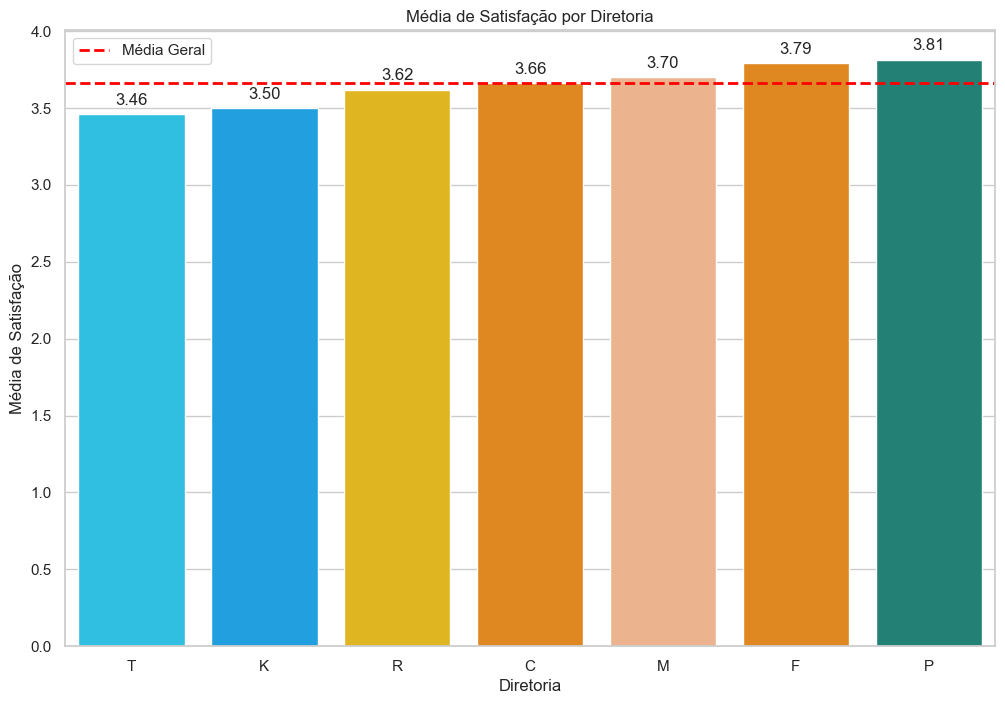

In [156]:
# Definir a paleta de cores em HEX
cores_hex = [
    "#12D0FF", "#01AAFF",  # Azuis
    "#FFC601", "#FF8A01",  # Laranjas
    "#FAB180", "#FF8A01",  # Tons de pele
    "#129180", "#12A101",  # Verdes
    "#FFFFFF", "#127001"   # Branco e Verde escuro
]

# Definir a paleta usando o seaborn
sns.set_palette(sns.color_palette(cores_hex))

# Calcular as médias para cada diretoria
medias_por_diretoria = df_satisfacao.groupby('diretoria')['Qual o seu nível de satisfação com a Comunicação Interna Sabesp?'].mean().sort_values()

# Calcular a média geral
media_geral = df_satisfacao['Qual o seu nível de satisfação com a Comunicação Interna Sabesp?'].mean()

# Configurações do gráfico
plt.figure(figsize=(12, 8))

# Criar o gráfico de barras
barplot = sns.barplot(x=medias_por_diretoria.index, y=medias_por_diretoria.values, order=medias_por_diretoria.index)

# Adicionar linha vermelha horizontal para a média geral
plt.axhline(media_geral, color='red', linestyle='dashed', linewidth=2, label='Média Geral')

# Adicionar rótulos
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Configurar rótulos e título
plt.xlabel('Diretoria')
plt.ylabel('Média de Satisfação')
plt.title('Média de Satisfação por Diretoria')

# Mostrar a legenda
plt.legend()

# Mostrar o gráfico
plt.show()

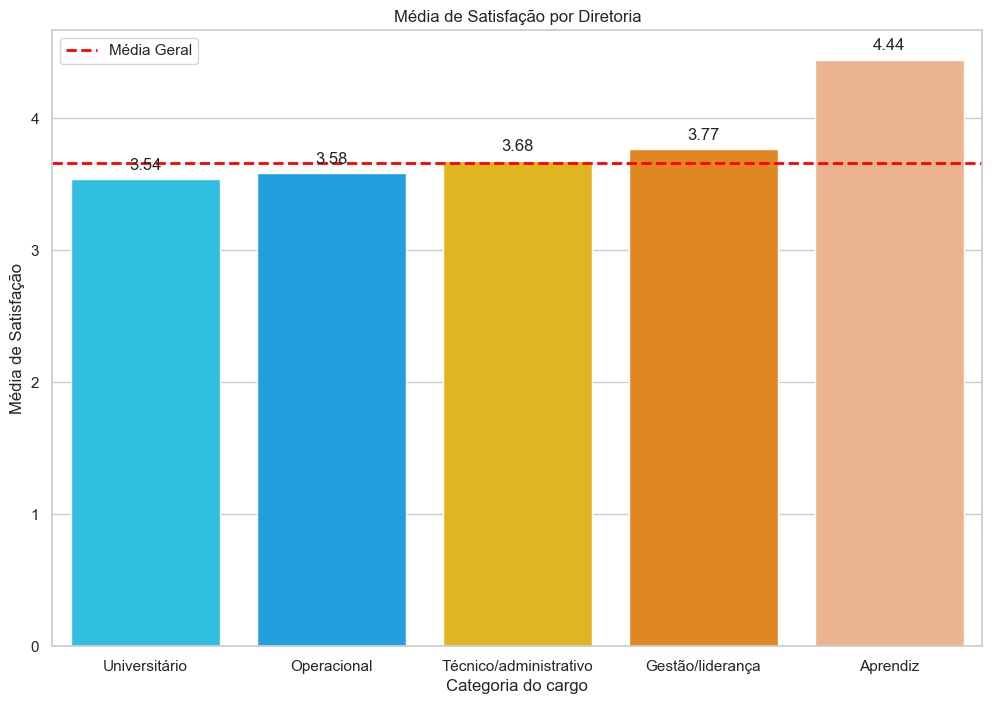

In [167]:
# Definir a paleta de cores em HEX
cores_hex = [
    "#12D0FF", "#01AAFF",  # Azuis
    "#FFC601", "#FF8A01",  # Laranjas
    "#FAB180", "#FF8A01",  # Tons de pele
    "#129180", "#12A101",  # Verdes
    "#FFFFFF", "#127001"   # Branco e Verde escuro
]

# Definir a paleta usando o seaborn
sns.set_palette(sns.color_palette(cores_hex))

# Calcular as médias para cada diretoria
medias_por_diretoria = df_satisfacao.groupby('Categoria do cargo')['Qual o seu nível de satisfação com a Comunicação Interna Sabesp?'].mean().sort_values()

# Calcular a média geral
media_geral = df_satisfacao['Qual o seu nível de satisfação com a Comunicação Interna Sabesp?'].mean()

# Configurações do gráfico
plt.figure(figsize=(12, 8))

# Criar o gráfico de barras
barplot = sns.barplot(x=medias_por_diretoria.index, y=medias_por_diretoria.values, order=medias_por_diretoria.index)

# Adicionar linha vermelha horizontal para a média geral
plt.axhline(media_geral, color='red', linestyle='dashed', linewidth=2, label='Média Geral')

# Adicionar rótulos
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Configurar rótulos e título
plt.xlabel('Categoria do cargo')
plt.ylabel('Média de Satisfação')
plt.title('Média de Satisfação por Diretoria')

# Mostrar a legenda
plt.legend()

# Mostrar o gráfico
plt.show()

In [159]:
mantem_informado = df['Me mantém informado sobre notícias externas'].value_counts()[0]
info_desinteressantes = df['As informações não me interessam'].value_counts()[0]
info_repetitivas = df['Informações repetitivas'].value_counts()[0]
falta_info_local = df['Gostaria de mais informações sobre a minha área'].value_counts()[0]
não_funciona = df['A da minha área não funciona'].value_counts()[0]

print(mantem_informado, info_desinteressantes, info_repetitivas, falta_info_local, não_funciona)

120 36 108 137 37


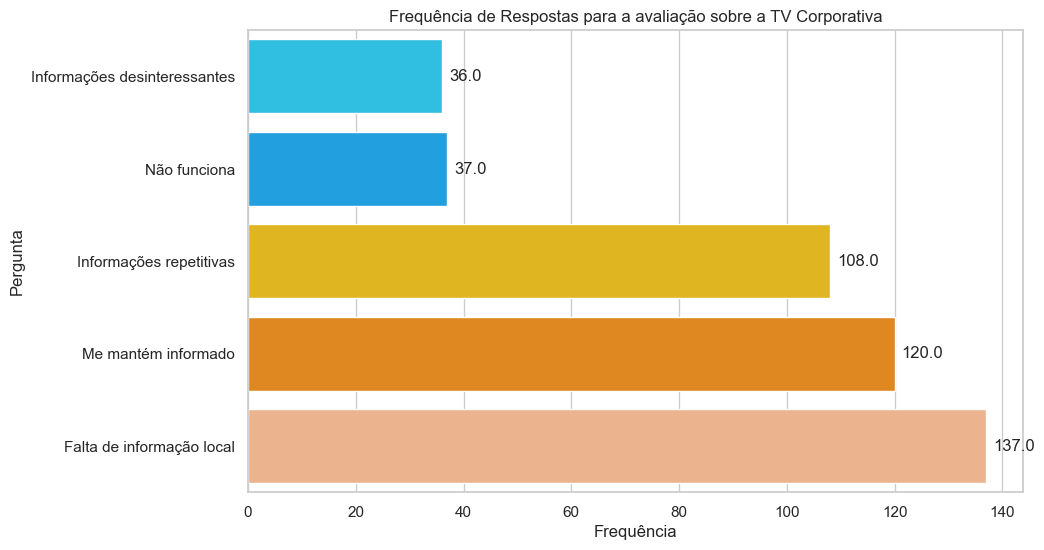

In [161]:
# Seu código para contar as frequências
mantem_informado = df['Me mantém informado sobre notícias externas'].value_counts()[0]
info_desinteressantes = df['As informações não me interessam'].value_counts()[0]
info_repetitivas = df['Informações repetitivas'].value_counts()[0]
falta_info_local = df['Gostaria de mais informações sobre a minha área'].value_counts()[0]
nao_funciona = df['A da minha área não funciona'].value_counts()[0]

# Criar um DataFrame para facilitar o plot
data = {
    'Pergunta': ['Me mantém informado', 'Informações desinteressantes', 'Informações repetitivas', 'Falta de informação local', 'Não funciona'],
    'Frequência': [mantem_informado, info_desinteressantes, info_repetitivas, falta_info_local, nao_funciona]
}

df_plot = pd.DataFrame(data)

# Ordenar o DataFrame por frequência
df_plot = df_plot.sort_values(by='Frequência')

# Configurar a paleta de cores
cores_hex = ["#12D0FF", "#01AAFF", "#FFC601", "#FF8A01", "#FAB180"]
sns.set_palette(sns.color_palette(cores_hex))

# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar o gráfico de barras
barplot = sns.barplot(x='Frequência', y='Pergunta', data=df_plot)

# Adicionar rótulos
for p in barplot.patches:
    barplot.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Configurar rótulos e título
plt.xlabel('Frequência')
plt.ylabel('Pergunta')
plt.title('Frequência de Respostas para a avaliação sobre a TV Corporativa')

# Mostrar o gráfico
plt.show()

In [163]:
df['Pensando no seu líder imediato, avalie seu grau de satisfação em relação ao repasse das informações de caráter interno (informações corporativas, RH, institucionais, projetos e programas etc.)'].value_counts()

Boa           622
Excelente     427
Regular       317
Ruim          131
Muito ruim    103
Name: Pensando no seu líder imediato, avalie seu grau de satisfação em relação ao repasse das informações de caráter interno (informações corporativas, RH, institucionais, projetos e programas etc.), dtype: int64

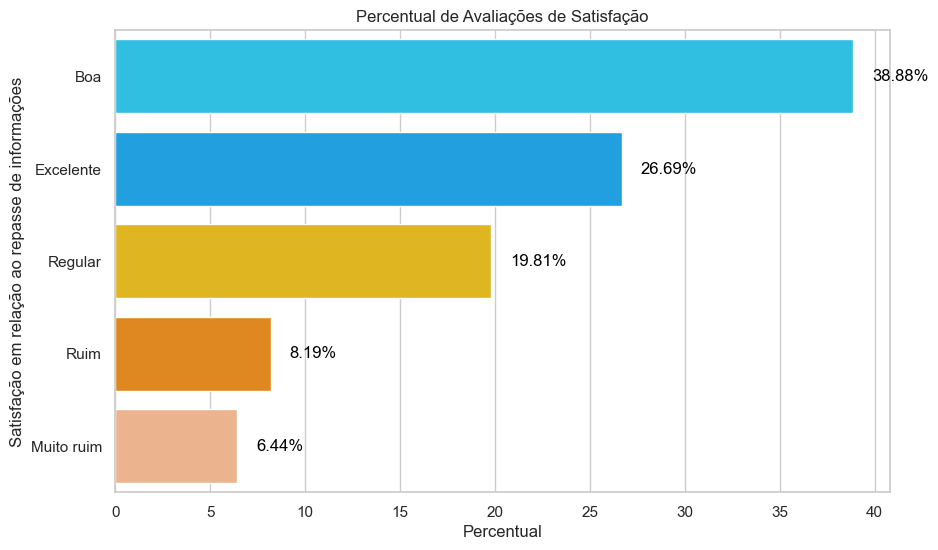

In [188]:
# Definir a paleta de cores em HEX
cores_hex = [
    "#12D0FF", "#01AAFF",  # Azuis
    "#FFC601", "#FF8A01",  # Laranjas
    "#FAB180", "#FF8A01",  # Tons de pele
    "#129180", "#12A101",  # Verdes
    "#FFFFFF", "#127001"   # Branco e Verde escuro
]

# Definir a paleta usando o seaborn
sns.set_palette(sns.color_palette(cores_hex))


# Substitua 'sua_coluna' pelo nome real da coluna no seu DataFrame
coluna_satisfacao = 'Pensando no seu líder imediato, avalie seu grau de satisfação em relação ao repasse das informações de caráter interno (informações corporativas, RH, institucionais, projetos e programas etc.)'

# Calcular os percentuais em relação ao total
percentuais = df[coluna_satisfacao].value_counts(normalize=True) * 100

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras com percentuais
sns.barplot(x=percentuais.values, y=percentuais.index)

# Adicionar rótulos
for i, v in enumerate(percentuais.values):
    plt.text(v + 1, i, f'{v:.2f}%', color='black', ha='left', va='center')

# Configurar rótulos e título
plt.xlabel('Percentual')
plt.ylabel('Satisfação em relação ao repasse de informações')
plt.title('Percentual de Avaliações de Satisfação')

# Mostrar o gráfico
plt.show()

In [171]:
df['Qual é o nível de familiaridade que você possui com o Workplace?'].value_counts()

Utilizo sempre           931
Pouco (1 vez por mês)    553
Nunca                    116
Name: Qual é o nível de familiaridade que você possui com o Workplace?, dtype: int64

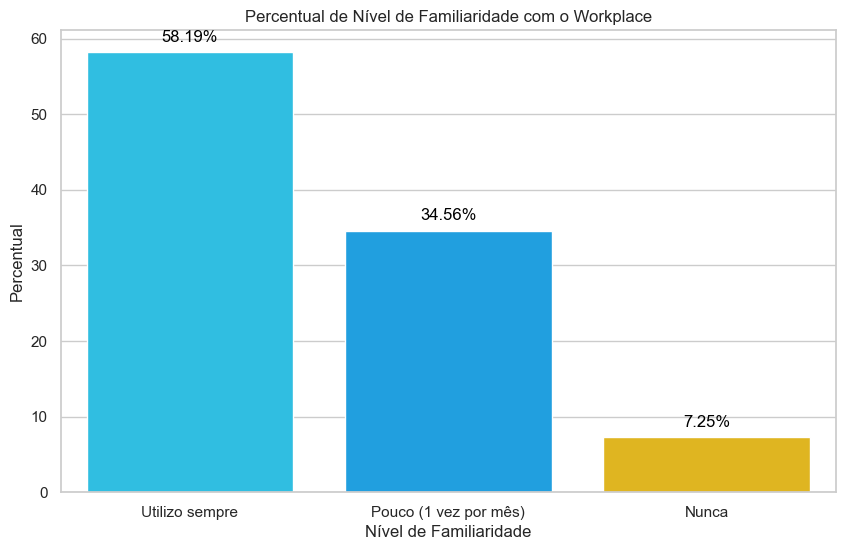

In [189]:

# Substitua 'sua_coluna' pelo nome real da coluna no seu DataFrame
coluna_familiaridade_workplace = 'Qual é o nível de familiaridade que você possui com o Workplace?'

# Calcular os percentuais em relação ao total
percentuais = df[coluna_familiaridade_workplace].value_counts(normalize=True) * 100

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras vertical com percentuais
sns.barplot(x=percentuais.index, y=percentuais.values)

# Adicionar rótulos
for i, v in enumerate(percentuais.values):
    plt.text(i, v + 1, f'{v:.2f}%', color='black', ha='center', va='bottom')

# Configurar rótulos e título
plt.xlabel('Nível de Familiaridade')
plt.ylabel('Percentual')
plt.title('Percentual de Nível de Familiaridade com o Workplace')

# Mostrar o gráfico
plt.show()

In [175]:
# Seu código para contar as frequências
info_gerais = df['Como você utiliza o Workplace? (selecione tantas quantas forem verdadeiras) - Acompanho informações corporativas de interesse geral - '].value_counts()[0]
curto = df['Curto, comento e divulgo posts e informações na plataforma'].value_counts()[0]
lives = df['Assisto as lives corporativas ou das unidades'].value_counts()[0]
acompanho = df['Acompanho os posts, comentários e publicações de meus colegas'].value_counts()[0]
adm_grupos = df['Administro um ou mais grupos'].value_counts()[0]
participo_grupos = df['Participo de grupos do meu interesse'].value_counts()[0]
rotina = df['Divulgo minha rotina, atividades ou projetos'].value_counts()[0]
crio = df['Crio conteúdo para um grupo'].value_counts()[0]
reuniões = df['Faço reuniões pela plataforma'].value_counts()[0]
projetos = df['Tenho grupos de trabalho ou projetos com colegas'].value_counts()[0]
chat = df['Troco mensagens e arquivos pelo chat'].value_counts()[0]

# Criar um DataFrame para facilitar o plot
data = {
    'Pergunta': ['acompanho informações gerais', 'curto e comento', 'assisto lives', 'acompanho posts de colegas', 'adm grupos', 'participo de grupos', 'divulgo minha rotina', 'crio conteúdo', 'faço reuniões', 'participo de grupos de projetos', 'uso o chat'],
    'Frequência': [info_gerais, curto, lives, acompanho, adm_grupos, participo_grupos, rotina, crio, reuniões, projetos, chat]
}

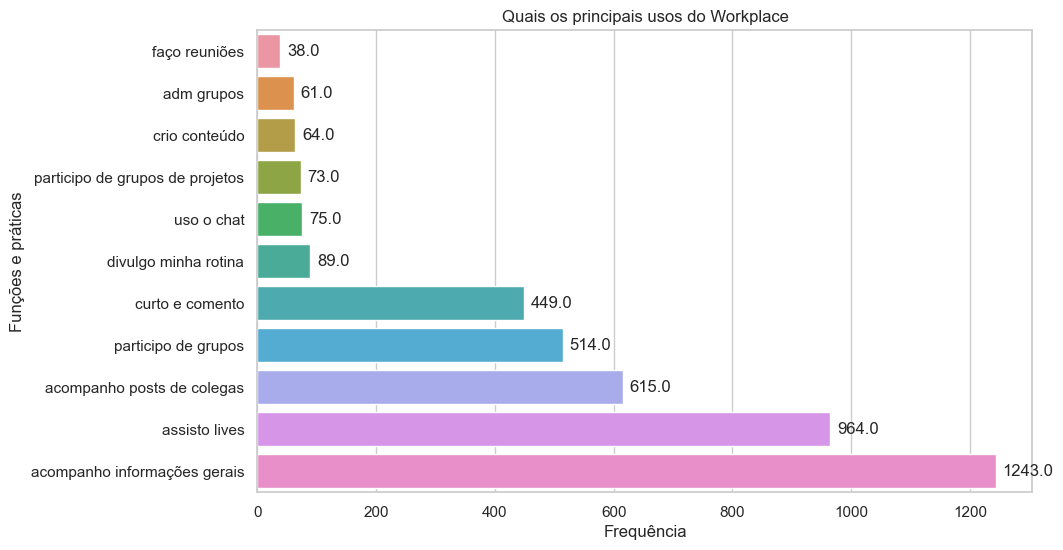

In [180]:
df_plot = pd.DataFrame(data)

# Ordenar o DataFrame por frequência
df_plot = df_plot.sort_values(by='Frequência')

# Configurar a paleta de cores
cores_hex = ["#12D0FF", "#01AAFF", "#FFC601", "#FF8A01", "#FAB180"]
sns.set_palette(sns.color_palette(cores_hex))

# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar o gráfico de barras
barplot = sns.barplot(x='Frequência', y='Pergunta', data=df_plot)

# Adicionar rótulos
for p in barplot.patches:
    barplot.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Configurar rótulos e título
plt.xlabel('Frequência')
plt.ylabel('Funções e práticas')
plt.title('Quais os principais usos do Workplace')

# Mostrar o gráfico
plt.show()

In [190]:
df['Acredito que o Workplace contribui com minha rotina de trabalho e atividades direta ou indiretamente?'].value_counts()

Sim    989
Não    447
Name: Acredito que o Workplace contribui com minha rotina de trabalho e atividades direta ou indiretamente?, dtype: int64

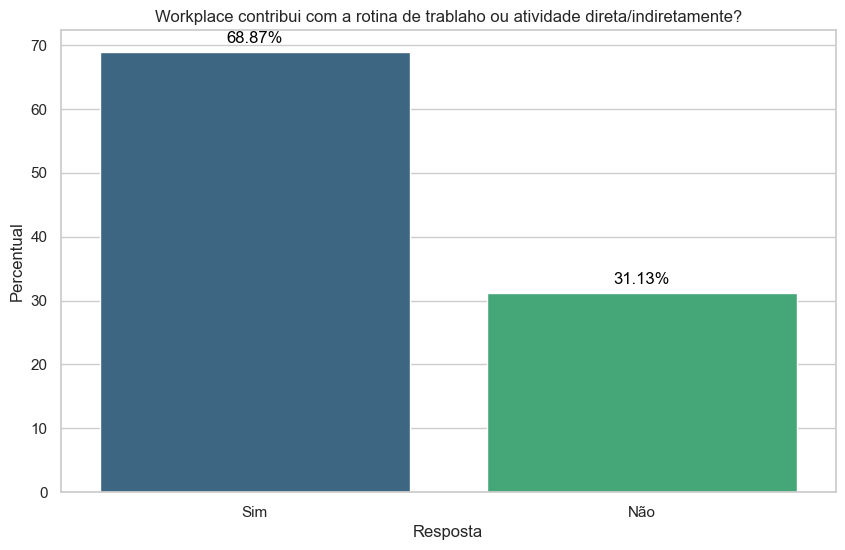

In [194]:
# Substitua 'sua_coluna' pelo nome real da coluna no seu DataFrame
coluna_contribui = 'Acredito que o Workplace contribui com minha rotina de trabalho e atividades direta ou indiretamente?'

# Calcular os percentuais em relação ao total
percentuais = df[coluna_contribui].value_counts(normalize=True) * 100

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras vertical com percentuais
sns.barplot(x=percentuais.index, y=percentuais.values,  palette='viridis')

# Adicionar rótulos
for i, v in enumerate(percentuais.values):
    plt.text(i, v + 1, f'{v:.2f}%', color='black', ha='center', va='bottom')

# Configurar rótulos e título
plt.xlabel('Resposta')
plt.ylabel('Percentual')
plt.title('Workplace contribui com a rotina de trablaho ou atividade direta/indiretamente?')

# Mostrar o gráfico
plt.show()